In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime
import string

from scipy.stats import genextreme
from scipy.stats import genpareto, expon, uniform, pareto

import os
import sys
import math
import scipy.stats 
from scipy.stats._continuous_distns import _distn_names
from scipy.optimize import curve_fit
from statistics import median
from statistics import mean
from statsmodels.tsa.stattools import adfuller
import scipy as sp
import scipy.special as spsp
from scipy.special import gamma,gammainc
from scipy import stats as stats
from scipy.stats import genextreme,gumbel_r
from scipy.stats import ttest_ind
from scipy.optimize import minimize
from scipy.stats import chi2

import pyextremes
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes
from pyextremes import EVA
import seaborn as sb


import math
from scipy.optimize import minimize
%matplotlib inline


In [3]:
# Data

# Application I
start = datetime(2000,1,1); end=datetime(2023,9,1)
data = yf.download('^GSPC', start, end, '1d')
#Daily Logarithmic Return
data['Daily Return'] = np.log(data['Close']/data['Open'])*100
data['Daily Loss'] = data['Daily Return']*-1
data['DailyLoss'] = data['Daily Loss']
df = pd.DataFrame()
df['Daily Loss'] = data['Daily Loss']
replace_negatives = np.vectorize(lambda x: 0 if x < 0 else x)
df['Daily Loss'] = replace_negatives(data['Daily Loss'])
df.index.names = ['Date']

# Application II
dataF = yf.download('^FCHI', start, end, '1d')
#Daily Logarithmic Return
dataF['Daily Return'] = np.log(dataF['Close']/dataF['Open'])*100
dataF['Daily Loss'] = dataF['Daily Return']*-1
dataF['DailyLoss'] = dataF['Daily Loss']


# Application III
dataI = yf.download('^FTSE', start, end, '1d')
#Daily Logarithmic Return
dataI['Daily Return'] = np.log(dataI['Close']/dataI['Open'])*100
dataI['Daily Loss'] = dataI['Daily Return']*-1
dataI['DailyLoss'] = dataI['Daily Loss']




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(<Figure size 1056x672 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Daily Loss'>)

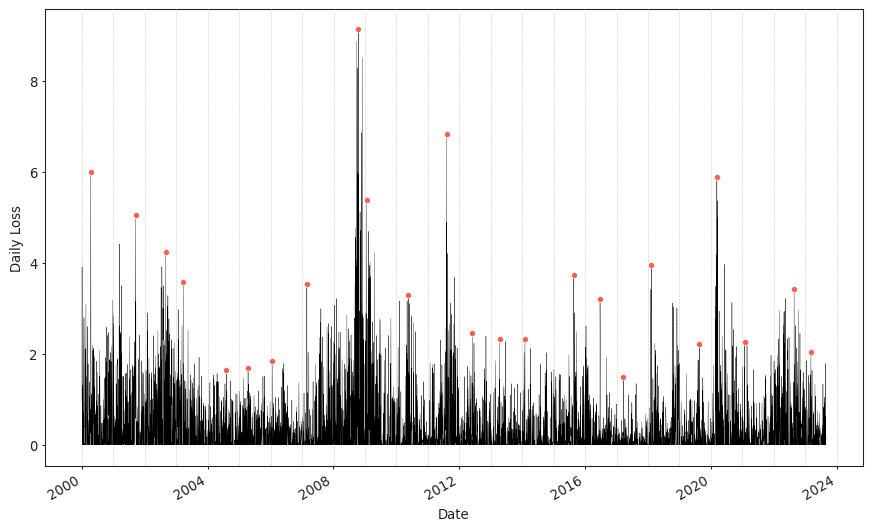

In [5]:
# Figure 1 
# Block Maxima Method
# Plot based on package named pyextremes


extremes = get_extremes(df['Daily Loss'], "BM")
# Adjusted plot_extreme based on plot_extremes function in pyextremes
plot_extreme(
    ts=df['Daily Loss'],
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D", figsize = (11,7))

C:\Users\zijun\AppData\Local\Temp\ipykernel_11316\3667002629.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(-1.9999, 0, 'r*', markersize=10, color='b')
C:\Users\zijun\AppData\Local\Temp\ipykernel_11316\3667002629.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(2, 0, 'r*', markersize=10, color='g')


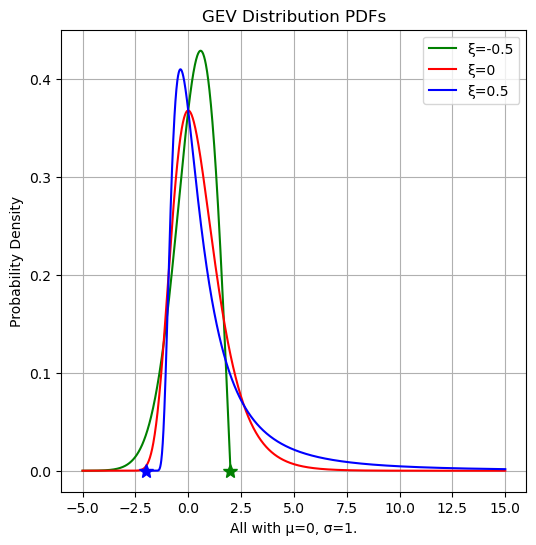

In [4]:
# Figure 2 
# GEV

# Generate data points for x-axis
x = np.linspace(-5, 15, 1500)
y = np.linspace(-1.9999, 15, 1500)
z = np.linspace(-5, 2, 500)
def gevpdf(x, loc, scale, shape):
    p=1+shape*((x-loc)/scale)
    replace_negatives = np.vectorize(lambda x: 0 if x < 0 else x)
    p=replace_negatives(p)
    result=(1/scale)*(p**(-((1/shape)+1)))*np.exp(-1*(p**(-1/shape)))
    return result

# Create the plot for each shape parameter
plt.figure(figsize=(6, 6))
gevd_pdf1 = gevpdf(z,0,1,-0.5)
gevd_pdf1k = gevpdf(z,0,1,-0.3)
gevd_pdf2 = genextreme.pdf(x, 0, loc=0, scale=1)
gevd_pdf3 = gevpdf(y,0,1,0.5)

plt.plot(z,gevd_pdf1, label='ξ=-0.5', color='g')
plt.plot(x,gevd_pdf2, label='ξ=0', color='r')
plt.plot(y,gevd_pdf3, label='ξ=0.5', color='b')


#Mark the endpoint PDF values with asterisks
plt.plot(-1.9999, 0, 'r*', markersize=10, color='b')
plt.plot(2, 0, 'r*', markersize=10, color='g')
    
   
plt.xlabel('All with µ=0, σ=1.')
plt.ylabel('Probability Density')
plt.title('GEV Distribution PDFs')
plt.legend()
plt.grid(True)
plt.show()

(<Figure size 1056x672 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Daily Loss'>)

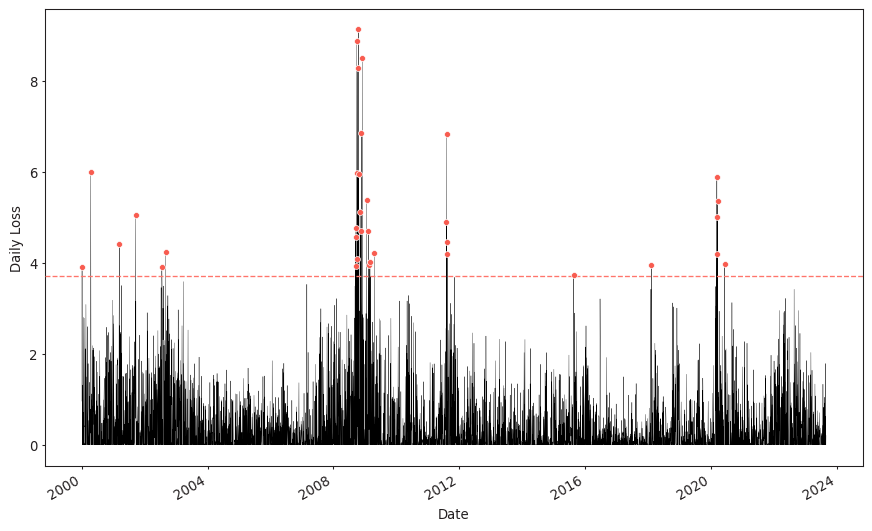

In [7]:
# Figure 3 
# POT Method
# Plot based on package named pyextremes

extremes = get_extremes(df['Daily Loss'], "POT", threshold = 3.7)

# Adjusted plot_extreme based on plot_extremes function in pyextremes
plot_extreme(
    ts=df['Daily Loss'],
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold = 3.7,
    figsize = (11,7))

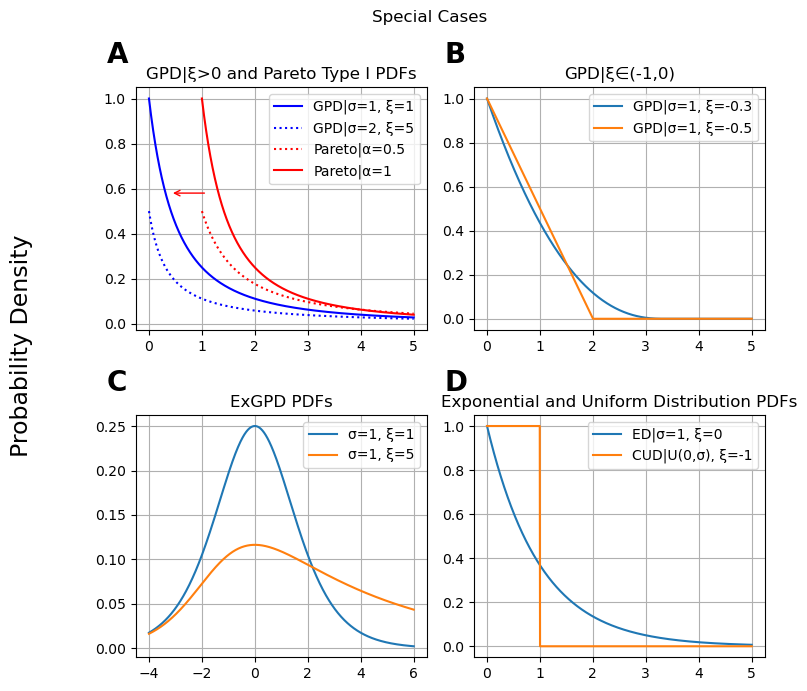

In [30]:
# Figure 4
# GPD

# Parameters for the Generalized Pareto Distribution (GPD)
gpd_shape = 1.0
gpd_scale = 1.0
gpd_loc = 0.0

# Parameters for other distributions
exp_rate = 1.0
uniform_low = 0.0
uniform_high = 1.0

# Generate data points for each distribution
x = np.linspace(0, 5, 1000)
y = np.linspace(-4, 6, 1000)
z = np.linspace(1, 5, 1000)

gpd_pdf = genpareto.pdf(x, gpd_shape, loc=gpd_loc, scale=gpd_scale)
gpd_pdf2 = genpareto.pdf(x, 5, loc=gpd_loc, scale=2)
gpd_pdf3 = genpareto.pdf(x, -0.3, loc=gpd_loc, scale=gpd_scale)
gpd_pdf4 = genpareto.pdf(x, -0.5, loc=gpd_loc, scale=gpd_scale)

exp_pdf = expon.pdf(x, scale=1 / exp_rate)
uniform_pdf = uniform.pdf(x, loc=uniform_low, scale=uniform_high - uniform_low)

pareto_pdf1 = pareto.pdf(z, 0.5)
pareto_pdf2 = pareto.pdf(z, 1)

def exp_gpd_pdf(x, k, sigma):
    return (np.exp(x) / sigma) * ((1 + (np.exp(x)*k)/sigma)**(-1/k - 1))

exp_gpd_pdf_values = exp_gpd_pdf(y, 1, 1)
exp_gpd_pdf_values2 = exp_gpd_pdf(y, 5, 1)

# Create four subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

fig.suptitle('Special Cases')

# Plot Generalized Pareto Distribution and Pareto Distribution
axs[0, 0].plot(x, gpd_pdf, label='GPD|σ=1, ξ=1', color = "blue")
axs[0, 0].plot(x, gpd_pdf2, label='GPD|σ=2, ξ=5',linestyle = 'dotted', color = "blue")
axs[0, 0].plot(z, pareto_pdf1, label='Pareto|α=0.5',linestyle = 'dotted', color = "red")
axs[0, 0].plot(z, pareto_pdf2, label='Pareto|α=1', color = "red")
#axs[0, 0].annotate(xy=(0.5, 0.7), xytext=(1.1, 0.7), arrowprops=dict(facecolor='red', shrink=0.05))
axs[0, 0].annotate("", xy=(0.4, 0.58), xytext=(1.1, 0.58), arrowprops=dict( ec='red', arrowstyle="->"))
axs[0, 0].set_title('GPD|ξ>0 and Pareto Type I PDFs')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 
axs[0, 1].plot(x, gpd_pdf3, label='GPD|σ=1, ξ=-0.3')
axs[0, 1].plot(x, gpd_pdf4, label='GPD|σ=1, ξ=-0.5')
axs[0, 1].set_title('GPD|ξ∈(-1,0)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Exponentiated Generalized Pareto Distribution
axs[1, 0].plot(y, exp_gpd_pdf_values, label='σ=1, ξ=1')
axs[1, 0].plot(y, exp_gpd_pdf_values2, label='σ=1, ξ=5')
axs[1, 0].set_title('ExGPD PDFs')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Exponential Distribution and Continuous Uniform Distribution
axs[1, 1].plot(x, exp_pdf, label='ED|σ=1, ξ=0')
axs[1, 1].plot(x, uniform_pdf, label='CUD|U(0,σ), ξ=-1')
axs[1, 1].set_title('Exponential and Uniform Distribution PDFs')
axs[1, 1].legend()
axs[1, 1].grid(True)

axs = axs.flat
for n, ax in enumerate(axs):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    
fig.text(-0.1, 0.5, 'Probability Density', va='center', rotation='vertical',fontsize=17)
# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('GPD.png')
plt.show()

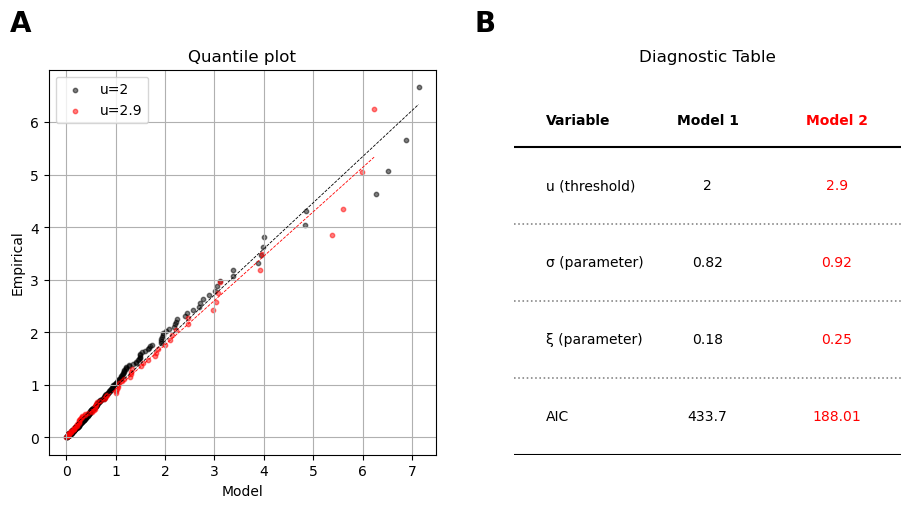

In [9]:
# Figure 5
# Examples of different threshold in POT


def get_q_q_plot(latency_values, distribution):
    distribution = getattr(scipy.stats, distribution)
    params = distribution.fit(latency_values)
    latency_values.sort()
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = []
    for i in range(1, len(latency_values)):
        x.append((i-0.5) / len(latency_values))
    y = distribution.ppf(x, loc=loc, scale=scale, *arg)
    y = list(y)
    emp_percentiles = latency_values[1:]
    dist_percentiles = y
    if len(params)==3:
        arg=arg[0]
    else:
        arg=0
    return emp_percentiles, dist_percentiles, scale, arg

def diff_u(threshold):
    test = get_extremes(data['Daily Loss'], "POT", threshold=threshold[0])-threshold[0]
    test = test.values.tolist()
    test2 = get_extremes(data['Daily Loss'], "POT", threshold=threshold[1])-threshold[1]
    test2 = test2.values.tolist()
    return test, test2

threshold=[2,2.9]
test, test2 = diff_u(threshold)
emp, dist, scale1, arg1 = get_q_q_plot(test, 'genpareto')
emp2, dist2, scale2, arg2 = get_q_q_plot(test2, 'genpareto')
m, c = np.polyfit(emp, dist, 1)
m2, c2 = np.polyfit(emp2, dist2, 1)

a=[];a.append(emp[0]);a.append(m*emp[0]+c);a.append(emp[-1]);a.append(m*emp[-1]+c)
a2=[];a2.append(emp2[0]);a2.append(m2*emp2[0]+c2);a2.append(emp2[-1]);a2.append(m2*emp2[-1]+c2)



k_gpd = 2
gpd_params = scipy.stats.genpareto.fit(test)
gpd_neg_log_likelihood = scipy.stats.genpareto.logpdf(test, *gpd_params).sum()
aic_gpd = 2 * k_gpd - 2 * gpd_neg_log_likelihood
gpd_params2 = scipy.stats.genpareto.fit(test2)
gpd_neg_log_likelihood2 = scipy.stats.genpareto.logpdf(test2, *gpd_params2).sum()
aic_gpd2 = 2 * k_gpd - 2 * gpd_neg_log_likelihood2


# Tabel
# Generate example data
data2 = {
    'Variable': ['AIC', 'ξ (parameter)', 'σ (parameter)', 'u (threshold)'],
    'Model 1': [str(round(aic_gpd,2)), str(round(arg1,2)), str(round(scale1,2)), str(threshold[0])],
    'Model 2': [str(round(aic_gpd2,2)), str(round(arg2,2)), str(round(scale2,2)), str(threshold[1])],
}
df_example_2 = pd.DataFrame(data2)

# Create a new figure and axis with a narrower size
fig, ax = plt.subplots(1, 2, figsize=(11, 5))


ncols = 3
nrows = df_example_2.shape[0]

ax[1].set_xlim(0, ncols)
ax[1].set_ylim(0, nrows+1)

# Adjust positions for a narrower table
positions = [0.25, 1.5, 2.5]
columns = ['Variable', 'Model 1', 'Model 2']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
            text_label = f'{df_example_2[column].iloc[i]}'
            weight = 'normal'
            ax[1].annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight)
        elif j == len(columns)-1:
            ha = 'center'
            text_label = f'{df_example_2[column].iloc[i]}'
            weight = 'normal'
            ax[1].annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            color='r',
            weight=weight)
        else:
            ha = 'center'
            text_label = f'{df_example_2[column].iloc[i]}'
            weight = 'normal'
            ax[1].annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight)
       
       

# Add column names
column_names = ['Variable', 'Model 1', 'Model 2']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
            ax[1].annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold')
        elif index == len(column_names)-1:
            ha = 'center'
            ax[1].annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            color='r',
            weight='bold')
        else:
            ha = 'center'
            ax[1].annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold')

ax[0].scatter(emp, dist, s=10, color='black',alpha=0.5,label='u='+str(threshold[0]))
ax[0].plot([a[0], a[2]], [a[1],a[3]], 'k--', linewidth=0.6)
ax[0].scatter(emp2, dist2, s=10, color='red',alpha=0.5,label='u='+str(threshold[1]))
ax[0].plot([a2[0], a2[2]], [a2[1],a2[3]], 'r--', linewidth=0.6)
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Empirical')
ax[0].title.set_text('Quantile plot')
        
# Add dividing lines
ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax[1].set_axis_off()
ax[1].title.set_text('Diagnostic Table')

axs = ax.flat
for n, ax in enumerate(axs):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    
plt.show()

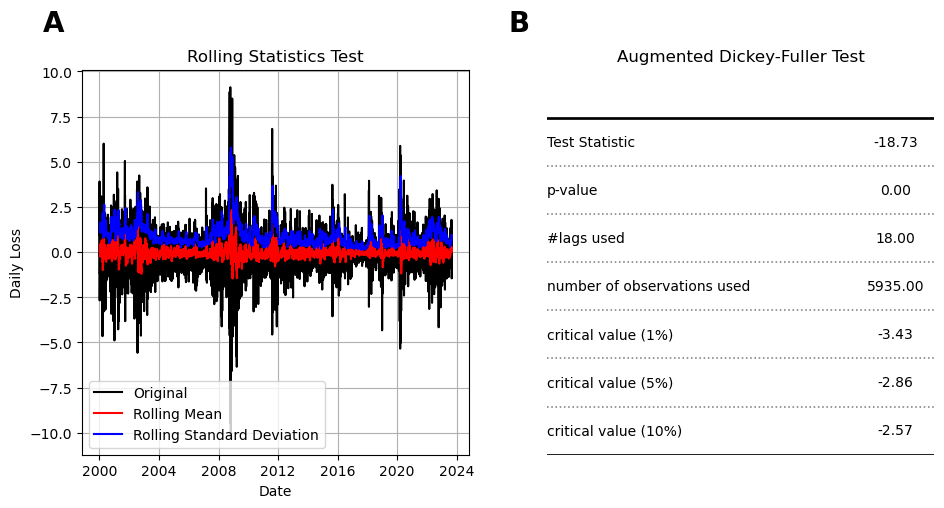

In [10]:
# Figure 7
# Stationarity Test

stationary_test(data['Daily Loss'])


[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

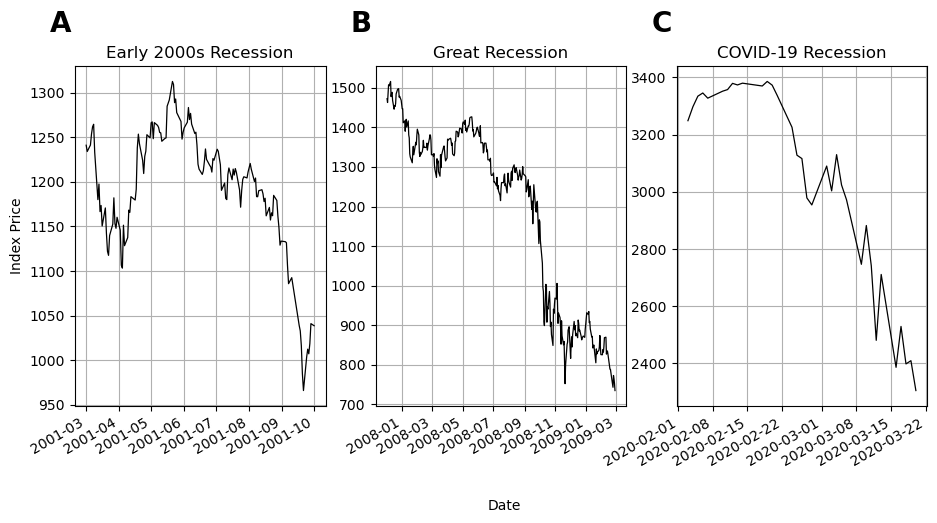

In [11]:
# Figure 8
datak = yf.download('^GSPC', start, end, '1d')
start1 = datetime(2001,3,1); end1=datetime(2001,10,1)
start2 = datetime(2007,12,1); end2=datetime(2009,3,1)
start3 = datetime(2020,2,1); end3=datetime(2020,3,22)


dp1 = datak.loc[start1:end1]["Adj Close"]
dp2 = datak.loc[start2:end2]["Adj Close"]
dp3 = datak.loc[start3:end3]["Adj Close"]
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax[0].plot(dp1,color='black',linewidth=0.9)
ax[1].plot(dp2,color='black',linewidth=0.9)
ax[2].plot(dp3,color='black',linewidth=0.9)

ax[0].grid()

ax[0].set_ylabel('Index Price')
ax[0].title.set_text("Early 2000s Recession")
ax[1].grid()
ax[1].title.set_text("Great Recession")
ax[2].grid()
ax[2].title.set_text("COVID-19 Recession")
fig.autofmt_xdate()
ax = ax.flat
for n, ax in enumerate(ax):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    
fig.text(0.5,0, 'Date', va='center', rotation='horizontal',fontsize=10)

In [12]:
# Application I
# BM method

In [13]:
# Table 1
DIC_1 = {}
block_size = ['M','2M','3M','6M','Y']
for i in block_size:
    ext = data.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    c, loc, scale = genextreme.fit(ext.tolist())
    c=-c
    DIC_1[i] = [c, loc, scale]
    DIC_1[i] = [round(x,3) for x in DIC_1[i]]
DIC_1

{'M': [0.172, 1.32, 0.773],
 '2M': [0.208, 1.71, 0.794],
 '3M': [0.21, 1.921, 0.827],
 '6M': [0.326, 2.25, 0.825],
 'Y': [0.315, 2.62, 1.107]}

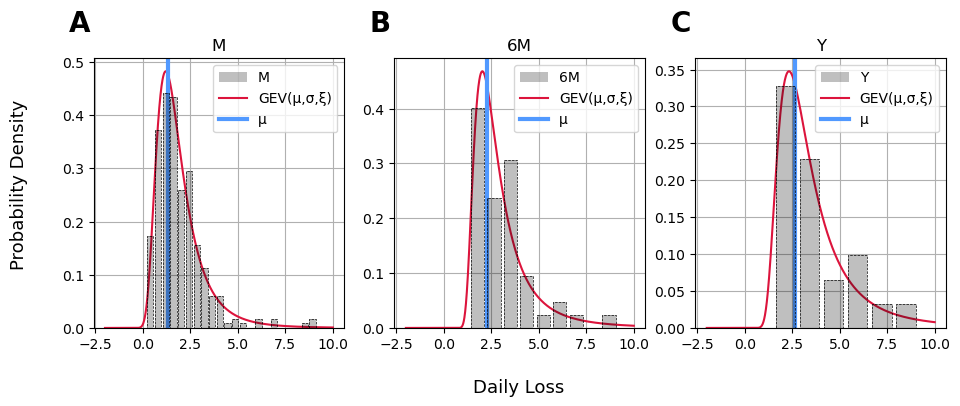

In [14]:
# Figure 9
block_size2=['M','6M','Y']
z = np.linspace(-2, 10, 1500)
plt.figure(figsize=(11, 3.5), dpi=100)
plt.subplots_adjust(hspace=0.2)

for n, i in enumerate(block_size2):
    ext = data.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    c, loc, scale = genextreme.fit(ext.tolist())
    gevd_pdf = genextreme.pdf(z, c, loc, scale)
    ax = plt.subplot(1, 3, n+1)
    ax.hist(
                ext,
                bins=np.histogram_bin_edges(a=ext, bins="auto"),
                density=True,
                rwidth=0.8,
                facecolor="#000000",
                edgecolor="#000000",
                lw=0,
                alpha=0.25,
                zorder=5,
                label=i,
            )
           
    ax.hist(ext,
            bins=np.histogram_bin_edges(a=ext, bins="auto"),
            density=True,
                rwidth=0.8,
                facecolor="None",
                edgecolor="#000000",
                lw=0.5,
                ls="--",
                zorder=10,
            )
    ax.plot(z,gevd_pdf, color='#DC143C',label='GEV(μ,σ,ξ)')
    
    ax.set_title(i)
    ax.axvline(loc, color='#5199FF', linestyle='solid', linewidth=3, label='μ')
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    if n==2:
        ax.text(-14.3, -0.08, 'Daily Loss', va='center', rotation='horizontal',fontsize=13)
    elif n==0:
        ax.text(-7, 0.27, 'Probability Density', va='center', rotation='vertical',fontsize=13)
    ax.legend()
    ax.grid()

plt.show()

In [15]:
# Table 2
list_1 = {}

for i in block_size:
    ext = data.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    ext = ext.values.tolist()
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genextreme')
    absv = mean(abs(x - y) for x, y in zip(emp, dist))
    absv = round(absv,3)
    list_1[i] = absv
    
list_1

{'M': 0.077, '2M': 0.108, '3M': 0.12, '6M': 0.189, 'Y': 0.415}

In [16]:
# Table 3
list_gum = {}
for i in block_size:
    ext = data.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    ext = ext.values.tolist()
    loc, scale = gumbel_r.fit(ext)
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'gumbel_r')
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    list_gum[i] = [[round(loc,3),round(scale,3)], absv2]
    hy_test(ext,genextreme,gumbel_r)
list_gum

C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0
Reject the null hypothesis: shape parameter is not equal to 0
Reject the null hypothesis: shape parameter is not equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


{'M': [[1.397, 0.841], 0.122],
 '2M': [[1.807, 0.884], 0.193],
 '3M': [[2.022, 0.92], 0.188],
 '6M': [[2.41, 0.99], 0.28],
 'Y': [[2.826, 1.31], 0.432]}

(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='DailyLoss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

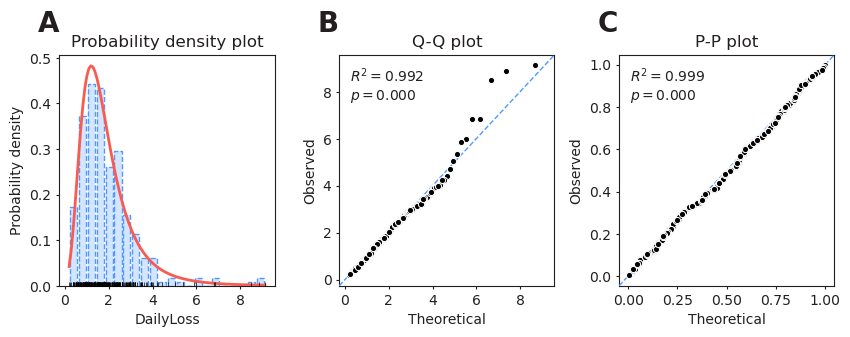

In [17]:
# Figure 10
# Diagnostic Plot
block_m = data.groupby(pd.Grouper(freq='M')).DailyLoss.max()
block_m.index = pd.date_range(start, periods=len(block_m))
model = EVA2(block_m)
model.get_extremes(method="BM", extremes_type='high', block_size='1D')
model.fit_model()
model.plot_diagnostic()

In [18]:
# Table 4
# Adjusted dataset
rece1 = data.loc[start1:end1]['Daily Loss']
rece2 = data.loc[start2:end2]['Daily Loss']
rece3 = data.loc[start3:end3]['Daily Loss']
rece = pd.DataFrame(pd.concat([rece1,rece2,rece3]))
# rebuild index for EVA2
rebuild = pd.date_range(start1, periods=len(rece))
rece.index = rebuild

DICT_VAR = {}
def C_Var(c, loc, scale, alpha, n):
    c=-c
    incomplete_gamma_function = gamma(1-c)*gammainc(1-c,-np.log(alpha**n))
    return loc+scale/((1-(alpha**n))*c)*(incomplete_gamma_function-1+(alpha**n))

ext = data.groupby(pd.Grouper(freq='M')).DailyLoss.max()
c, loc, scale = genextreme.fit(ext.tolist())
DICT_VAR['return level'] = round(genextreme.ppf(1-1/107,c,loc,scale),3)
DICT_VAR['Var_95'] = round(genextreme.ppf(0.95**21,c,loc,scale),3)
DICT_VAR['Var_99'] = round(genextreme.ppf(0.99**21,c,loc,scale),3)
DICT_VAR['ES_95'] = round(C_Var(c, loc, scale, 0.95, 21),3)
DICT_VAR['ES_99'] = round(C_Var(c, loc, scale, 0.99, 21),3)
DICT_VAR

{'return level': 6.856,
 'Var_95': 1.263,
 'Var_99': 2.699,
 'ES_95': 2.472,
 'ES_99': 3.99}

In [21]:
# POT method
# Table 5

Name = ['Mean','Median','Average of MM','# of Observations']
rece_pos = rece['Daily Loss'].values.tolist()
rece_list = [x for x in rece_pos if x > 0]
m = mean(rece_list)
me = median(rece_list)
av = (m+me)/2
obser = pyextremes.extremes.get_extremes(data['Daily Loss'], 'POT', extremes_type='high', threshold=av)
obser = len(obser)
Value = [m, me, av, obser]
list_3 = {}
for n, i in enumerate(Name):
    list_3[i] = Value[n]
list_3

{'Mean': 1.6303656227141479,
 'Median': 1.1602649947771666,
 'Average of MM': 1.3953153087456571,
 '# of Observations': 445}

In [22]:
#Table 6
threshold_value = [1.4, 1.45, 1.5, 1.55, 1.6]
list_4={}
for i in threshold_value:
    ext = pyextremes.extremes.get_extremes(data['Daily Loss']-i, 'POT', extremes_type='high', threshold=0)
    ext = ext.tolist()
    c, loc, scale = genpareto.fit(ext)
    loc2, scale2 = expon.fit(ext)
    length = len(ext)
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genpareto')
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'expon')
    absv = mean(abs(x - y) for x, y in zip(emp, dist))
    absv = round(absv,3)
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    list_4[i] = [[round(c,3), round(scale,3)],[0,round(scale2,3)], length, [absv,absv2]]
list_4    

{1.4: [[0.139, 0.792], [0, 0.921], 443, [0.045, 0.096]],
 1.45: [[0.163, 0.762], [0, 0.91], 426, [0.04, 0.103]],
 1.5: [[0.177, 0.753], [0, 0.912], 402, [0.04, 0.108]],
 1.55: [[0.163, 0.779], [0, 0.929], 374, [0.045, 0.108]],
 1.6: [[0.149, 0.809], [0, 0.951], 346, [0.053, 0.108]]}

(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='Daily Loss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

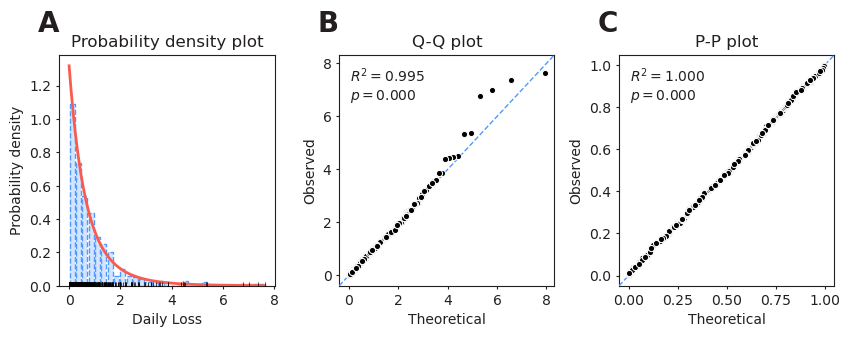

In [23]:
# Figure 11
model = EVA2(data['Daily Loss']-1.5)
model.get_extremes(method="POT", extremes_type='high', threshold=0)
model.fit_model()
model.plot_diagnostic(alpha=0.95)

In [37]:
# Table 7
threshold2 = 1.5
ext = pyextremes.extremes.get_extremes(data['Daily Loss'] - threshold2, 'POT', extremes_type='high', threshold=0)
c, loc, scale = genpareto.fit(ext.tolist())
def POT_Q(c,loc,scale, data, ext):
    dictq={}
    alpha1 = 0.95
    alpha2 = 0.99
    VaR_POT_95 = threshold2 + scale/c*((len(data['Daily Loss'])/len(ext)*(1-alpha1))**(-c)-1)
    VaR_POT_99 = threshold2 + scale/c*((len(data['Daily Loss'])/len(ext)*(1-alpha2))**(-c)-1)
    ES_POT_95 = (VaR_POT_95+scale-c*1.5)/(1-c)
    ES_POT_99 = (VaR_POT_99+scale-c*1.5)/(1-c)
    dictq['r-107'] = round(threshold2 + scale/c*((1/107)**(-c)-1),3)
    dictq['VaR_POT_95'] = round(VaR_POT_95,3)
    dictq['VaR_POT_99'] = round(VaR_POT_99,3)
    dictq['ES_POT_95'] = round(ES_POT_95,3)
    dictq['ES_POT_99'] = round(ES_POT_99,3)
    return dictq
POT_Q(c, loc, scale, data, ext)

{'r-107': 6.97,
 'VaR_POT_95': 1.732,
 'VaR_POT_99': 3.211,
 'ES_POT_95': 2.697,
 'ES_POT_99': 4.493}

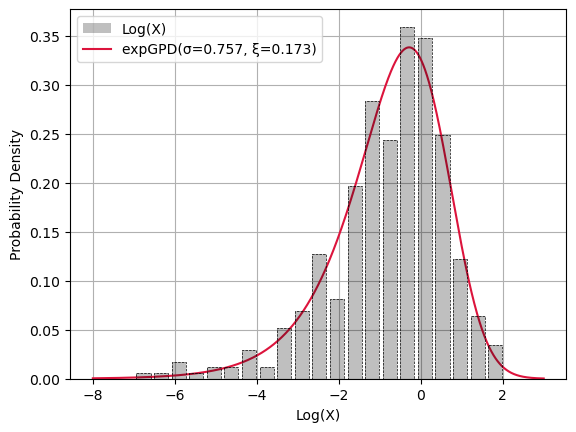

In [25]:
# Figure 12
ze = np.linspace(-8, 3, 1500)
exq = pyextremes.extremes.get_extremes(data['Daily Loss']-1.5, 'POT', extremes_type='high', threshold=0)
params = scipy.stats.genpareto.fit(exq)
exp = np.log(pyextremes.extremes.get_extremes(data['Daily Loss']-1.5, 'POT', extremes_type='high', threshold=0))
plt.hist(
                exp,
                bins=np.histogram_bin_edges(a=exp, bins="auto"),
                density=True,
                rwidth=0.8,
                facecolor="#000000",
                edgecolor="#000000",
                lw=0,
                alpha=0.25,
                zorder=5,
                label='Log(X)',
            )
plt.hist(exp,
            bins=np.histogram_bin_edges(a=exp, bins="auto"),
            density=True,
                rwidth=0.8,
                facecolor="None",
                edgecolor="#000000",
                lw=0.5,
                ls="--",
                zorder=10,
            )
   
expgpd= exp_gpd_pdf(ze,params[0], params[2])
    
plt.plot(ze,expgpd, color='#DC143C',label='expGPD(σ=0.757, ξ=0.173)')
plt.legend()
plt.xlabel('Log(X)')
plt.ylabel('Probability Density')
plt.grid()
plt.show()

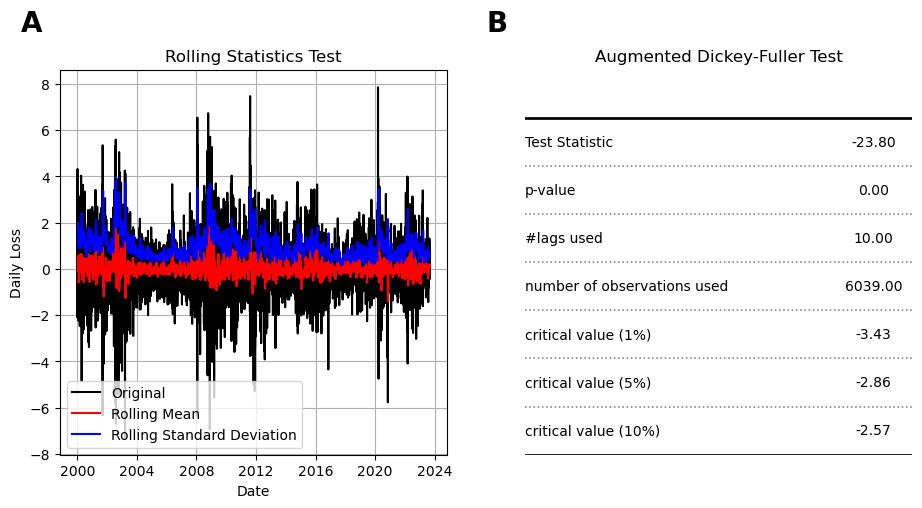

In [26]:
# Application 2
# Figure 13

stationary_test(dataF['Daily Loss'])

In [20]:
# Table 8


list_wei2 = {}
list_gum2 = {}
for i in block_size:
    ext = dataF.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    ext = ext.tolist()
    c, loc, scale = genextreme.fit(ext)
    c = -c
    loc2, scale2 = gumbel_r.fit(ext)
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genextreme')
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'gumbel_r')
    absv1 = mean(abs(x - y) for x, y in zip(emp, dist))
    absv1 = round(absv1,3)
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    k1 = [c, loc, scale]; k1 = [round(x,3) for x in k1];
    k2 = [loc2, scale2]; k2 = [round(x,3) for x in k2];
    list_wei2[i] = [k1, absv1]
    list_gum2[i] = [k2, absv2]
    hy_test(ext, genextreme, gumbel_r)
list_wei2, list_gum2

C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


({'M': [[0.092, 1.513, 0.854], 0.065],
  '2M': [[0.122, 1.914, 0.894], 0.117],
  '3M': [[0.087, 2.21, 0.955], 0.135],
  '6M': [[0.053, 2.597, 1.148], 0.221],
  'Y': [[-0.024, 3.241, 1.322], 0.355]},
 {'M': [[1.557, 0.887], 0.085],
  '2M': [[1.975, 0.944], 0.129],
  '3M': [[2.257, 0.988], 0.145],
  '6M': [[2.631, 1.171], 0.229],
  'Y': [[3.224, 1.312], 0.351]})

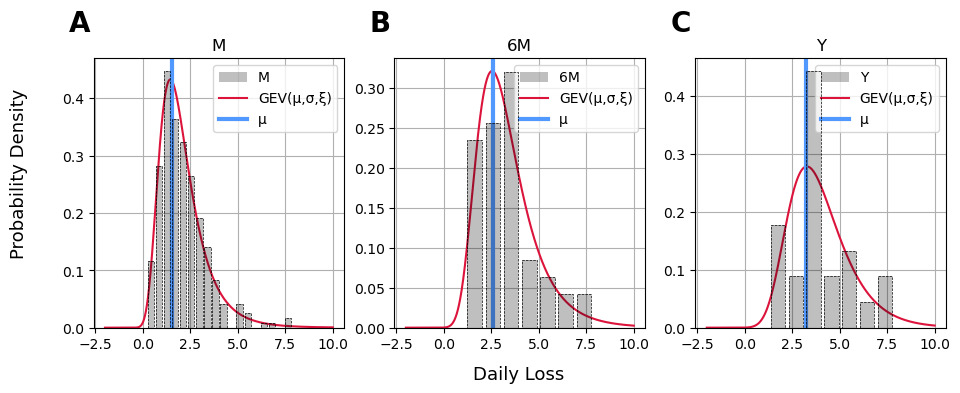

In [23]:
# Figure 14


z = np.linspace(-2, 10, 1500)
plt.figure(figsize=(11, 3.5), dpi=100)
plt.subplots_adjust(hspace=0.2)

for n, i in enumerate(block_size2):
    ext = dataF.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    params = genextreme.fit(ext)
    gevd_pdf = genextreme.pdf(z,*params)
    ax = plt.subplot(1, 3, n+1)
    ax.hist(
                ext,
                bins=np.histogram_bin_edges(a=ext, bins="auto"),
                density=True,
                rwidth=0.8,
                facecolor="#000000",
                edgecolor="#000000",
                lw=0,
                alpha=0.25,
                zorder=5,
                label=i,
            )
           
    ax.hist(ext,
            bins=np.histogram_bin_edges(a=ext, bins="auto"),
            density=True,
                rwidth=0.8,
                facecolor="None",
                edgecolor="#000000",
                lw=0.5,
                ls="--",
                zorder=10,
            )
    ax.plot(z,gevd_pdf, color='#DC143C',label='GEV(μ,σ,ξ)')
    
    ax.set_title(i)
    ax.axvline(params[1], color='#5199FF', linestyle='solid', linewidth=3, label='μ')
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    if n==2:
        ax.text(-14.3, -0.08, 'Daily Loss', va='center', rotation='horizontal',fontsize=13)
    elif n==0:
        ax.text(-7, 0.27, 'Probability Density', va='center', rotation='vertical',fontsize=13)
    ax.legend()
    ax.grid()

plt.show()

(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='DailyLoss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

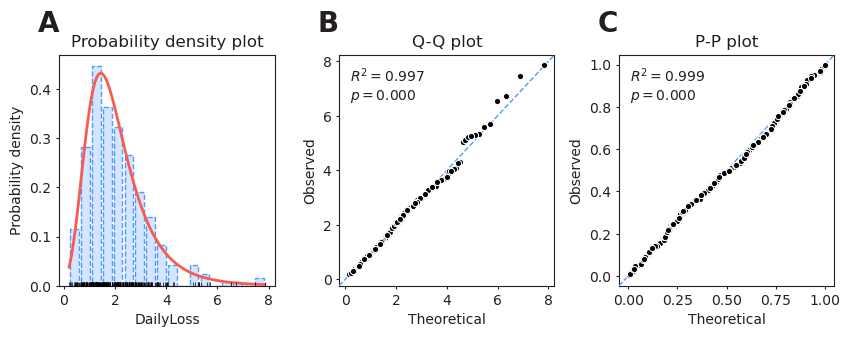

In [25]:
# Figure 15
# Diagnostic Plot
block_m = dataF.groupby(pd.Grouper(freq='M')).DailyLoss.max()
block_m.index = pd.date_range(start, periods=len(block_m))
model = EVA2(block_m)
model.get_extremes(method="BM", extremes_type='high', block_size='1D')
model.fit_model()
summary = model.get_summary(
        return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
        alpha=0.95,
        n_samples=1000,
        )
model.plot_diagnostic(alpha=0.95)

In [27]:
#Table 9
# POT method

receF = pd.DataFrame(pd.concat([dataF.loc[start1:end1]['Daily Loss'],dataF.loc[start2:end2]['Daily Loss'],dataF.loc[start3:end3]['Daily Loss']]))
# rebuild index for EVA2 
receF.index = pd.date_range(start1, periods=len(receF))
receF_pos = receF['Daily Loss'].values.tolist()
receF_list = [x for x in receF_pos if x > 0]
mF = mean(receF_list)
meF = median(receF_list)
avF = (mF+meF)/2
obserF = pyextremes.extremes.get_extremes(dataF['Daily Loss'], 'POT', extremes_type='high', threshold=avF)
obserF = len(obserF)
ValueF = [mF, meF, avF, obserF]
list_F = {}
for n, i in enumerate(Name):
    list_F[i] = round(ValueF[n],3)
list_F

{'Mean': 1.413,
 'Median': 1.017,
 'Average of MM': 1.215,
 '# of Observations': 585}

In [28]:


threshold_valueF = [1.215, 1.3, 1.4, 1.5, 1.6]

list_F2ex={}

for i in threshold_valueF:
    ext = pyextremes.extremes.get_extremes(dataF['Daily Loss']-i, 'POT', extremes_type='high', threshold=0)
    ext = ext.tolist()
    c, loc, scale = genpareto.fit(ext)
    loc2, scale2 = expon.fit(ext)
    hy_test(ext, genpareto, expon)
    length = len(ext)
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genpareto')
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'expon')
    absv = mean(abs(x - y) for x, y in zip(emp, dist))
    absv = round(absv,3)
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    list_F2ex[i] = [[round(c,3), round(scale,3)],[0,round(scale2,3)], length, [absv,absv2]]
list_F2ex    

C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\AppData\Local\Temp\ipykernel_16184\3578454739.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  lrs = 2 * (fit_result_null.fun - fit_result_full.fun)


Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\AppData\Local\Temp\ipykernel_16184\3578454739.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  lrs = 2 * (fit_result_null.fun - fit_result_full.fun)


Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\AppData\Local\Temp\ipykernel_16184\3578454739.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  lrs = 2 * (fit_result_null.fun - fit_result_full.fun)


{1.215: [[0.017, 0.921], [0, 0.936], 585, [0.031, 0.031]],
 1.3: [[0.006, 0.942], [0, 0.958], 522, [0.04, 0.039]],
 1.4: [[0.004, 0.944], [0, 0.948], 476, [0.038, 0.039]],
 1.5: [[0.032, 0.893], [0, 0.923], 438, [0.031, 0.035]],
 1.6: [[0.039, 0.883], [0, 0.92], 396, [0.033, 0.039]]}

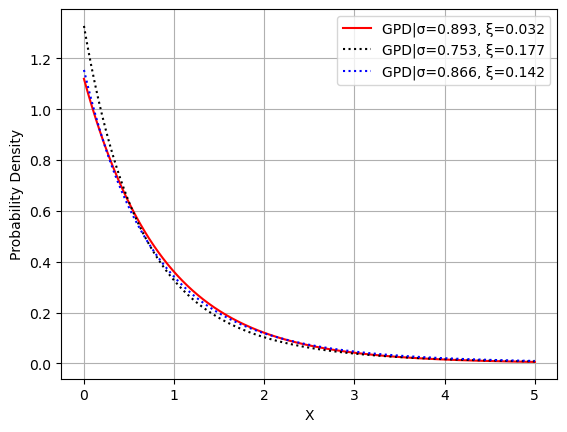

In [33]:
# Figure 16


gpd_pdf11 = genpareto.pdf(x, 0.032, loc=0, scale=0.893)
gpd_pdf12 = genpareto.pdf(x, 0.177, loc=0, scale=0.753)
gpd_pdf13 = genpareto.pdf(x, 0.142, loc=0, scale=0.866)

# Plot Generalized Pareto Distribution and Pareto Distribution
plt.plot(x, gpd_pdf11, label='GPD|σ=0.893, ξ=0.032', color = "red")
plt.plot(x, gpd_pdf12, label='GPD|σ=0.753, ξ=0.177',linestyle = 'dotted', color = "black")
plt.plot(x, gpd_pdf13, label='GPD|σ=0.866, ξ=0.142',linestyle = 'dotted', color = "blue")
plt.ylabel('Probability Density')
plt.xlabel('X')
plt.legend()
plt.grid(True)



(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='Daily Loss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

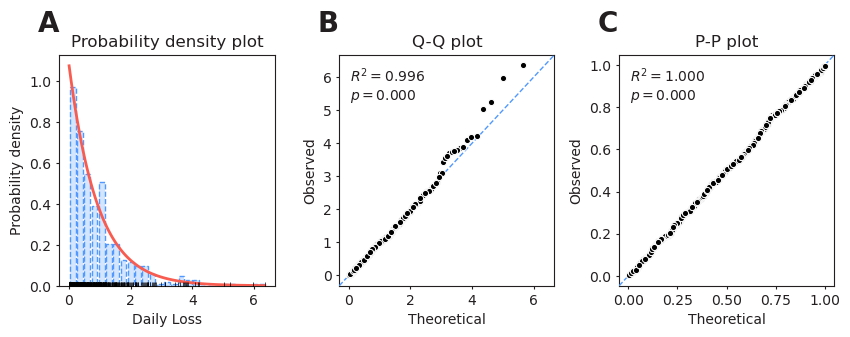

In [43]:
# Figure 17
model = EVA2(dataF['Daily Loss']-1.5)
model.get_extremes(method="POT", extremes_type='high', threshold=0)
model.fit_model()
model.plot_diagnostic(alpha=0.95)

In [39]:
#Table 11
ext = dataF.groupby(pd.Grouper(freq='M')).DailyLoss.max()
c, loc, scale = genextreme.fit(ext.tolist())
DICT_VAR['return level'] = round(genextreme.ppf(1-1/107,c,loc,scale),3)
DICT_VAR['Var_95'] = round(genextreme.ppf(0.95**21,c,loc,scale),3)
DICT_VAR['Var_99'] = round(genextreme.ppf(0.99**21,c,loc,scale),3)
DICT_VAR['ES_95'] = round(C_Var(c, loc, scale, 0.95, 21),3)
DICT_VAR['ES_99'] = round(C_Var(c, loc, scale, 0.99, 21),3)
threshold2 = 1.5
ext2 = pyextremes.extremes.get_extremes(dataF['Daily Loss'] - threshold2, 'POT', extremes_type='high', threshold=0)
c2, loc2, scale2 = genpareto.fit(ext2.tolist())
DICT_VAR, POT_Q(c2, loc2, scale2,dataF,ext2)

({'return level': 6.491,
  'Var_95': 1.45,
  'Var_99': 2.941,
  'ES_95': 2.661,
  'ES_99': 4.087},
 {'r-107': 6.003,
  'VaR_POT_95': 1.833,
  'VaR_POT_99': 3.326,
  'ES_POT_95': 2.767,
  'ES_POT_99': 4.309})

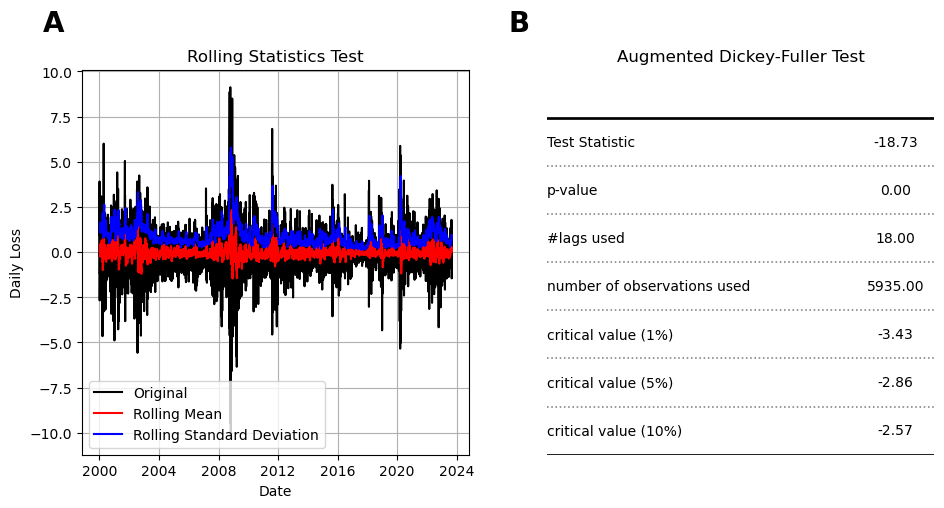

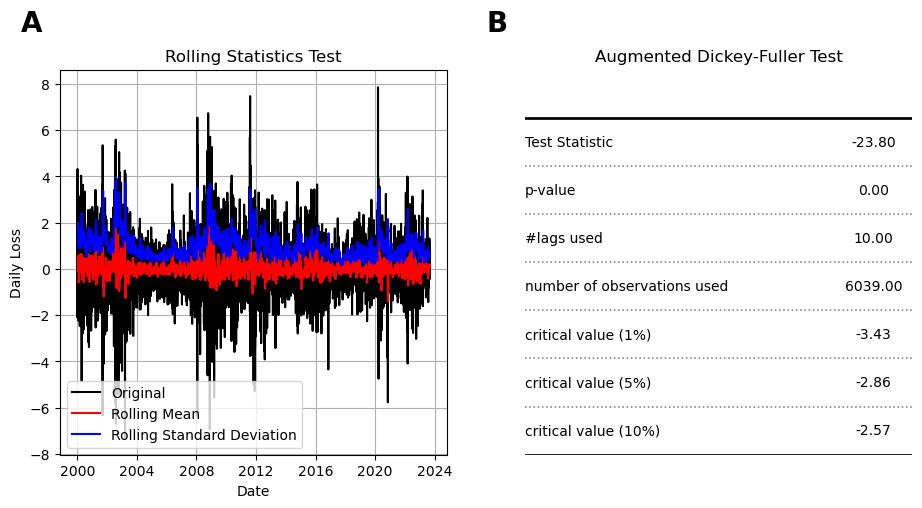

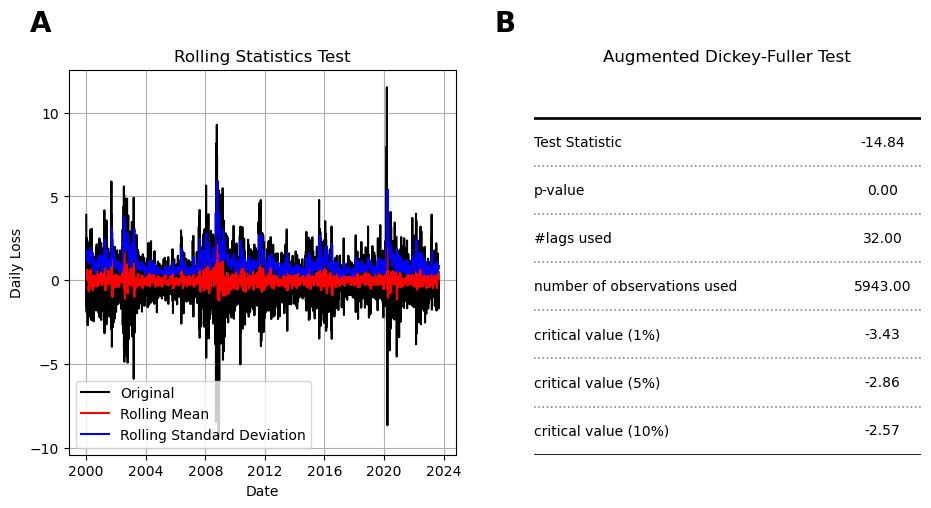

C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0
Reject the null hypothesis: shape parameter is not equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Reject the null hypothesis: shape parameter is not equal to 0
Reject the null hypothesis: shape parameter is not equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


({'M': [[0.21, 1.406, 0.764], 0.071],
  '2M': [[0.196, 1.823, 0.837], 0.099],
  '3M': [[0.258, 2.053, 0.863], 0.146],
  '6M': [[0.3, 2.411, 1.013], 0.279],
  'Y': [[0.239, 3.295, 1.139], 0.441]},
 {'M': [[1.5, 0.852], 0.148],
  '2M': [[1.919, 0.925], 0.182],
  '3M': [[2.186, 0.994], 0.217],
  '6M': [[2.594, 1.197], 0.31],
  'Y': [[3.453, 1.294], 0.466]})

In [54]:
# Application III
#Table 12
stationary_test(data['Daily Loss'])
stationary_test(dataF['Daily Loss'])
stationary_test(dataI['Daily Loss'])
list_wei3 = {}
list_gum3 = {}
for i in block_size:
    ext = dataI.groupby(pd.Grouper(freq=i)).DailyLoss.max()
    ext = ext.tolist()
    c, loc, scale = genextreme.fit(ext)
    c = -c
    loc2, scale2 = gumbel_r.fit(ext)
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genextreme')
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'gumbel_r')
    absv1 = mean(abs(x - y) for x, y in zip(emp, dist))
    absv1 = round(absv1,3)
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    k1 = [c, loc, scale]; k1 = [round(x,3) for x in k1];
    k2 = [loc2, scale2]; k2 = [round(x,3) for x in k2];
    list_wei3[i] = [k1, absv1]
    list_gum3[i] = [k2, absv2]
    hy_test(ext, genextreme, gumbel_r)
list_wei3, list_gum3

(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='DailyLoss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

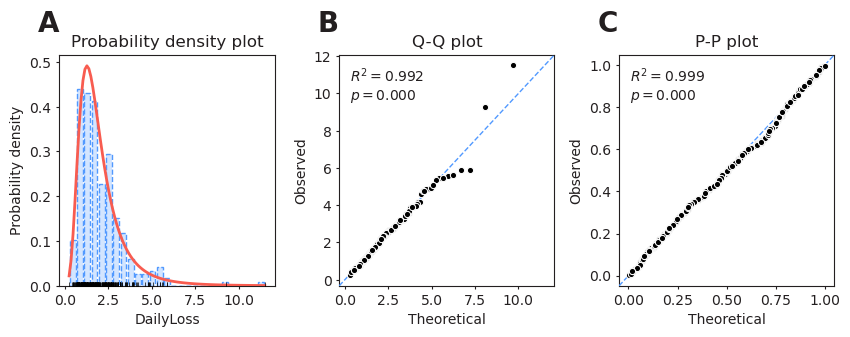

In [60]:
block_I = dataI.groupby(pd.Grouper(freq='M')).DailyLoss.max()
block_I.index = pd.date_range(start, periods=len(block_I))
model = EVA2(block_I)
model.get_extremes(method="BM", extremes_type='high', block_size='1D')
model.fit_model()
model.plot_diagnostic()

In [57]:
receI = pd.DataFrame(pd.concat([dataI.loc[start1:end1]['Daily Loss'],dataI.loc[start2:end2]['Daily Loss'],dataI.loc[start3:end3]['Daily Loss']]))
# rebuild index for EVA2 
receI.index = pd.date_range(start1, periods=len(receI))
receI_pos = receI['Daily Loss'].values.tolist()
receI_list = [x for x in receI_pos if x > 0]
mI = mean(receI_list)
meI = median(receI_list)
avI = (mI+meI)/2
obserI = pyextremes.extremes.get_extremes(dataI['Daily Loss'], 'POT', extremes_type='high', threshold=avI)
obserI = len(obserI)
ValueI = [mI, meI, avI, obserI]
list_I = {}
for n, i in enumerate(Name):
    list_I[i] = round(ValueI[n],3)
list_I



{'Mean': 1.518,
 'Median': 1.03,
 'Average of MM': 1.274,
 '# of Observations': 504}

In [26]:
threshold_valueI = [1.274, 1.35, 1.45, 1.5, 1.65]

list_I2ex={}

for i in threshold_valueI:
    ext = pyextremes.extremes.get_extremes(dataI['Daily Loss']-i, 'POT', extremes_type='high', threshold=0)
    ext = ext.tolist()
    c, loc, scale = genpareto.fit(ext)
    loc2, scale2 = expon.fit(ext)
    hy_test(ext, genpareto, expon)
    length = len(ext)
    emp, dist, unr1, unr2 = get_q_q_plot(ext, 'genpareto')
    emp2, dist2, unr1, unr2 = get_q_q_plot(ext, 'expon')
    absv = mean(abs(x - y) for x, y in zip(emp, dist))
    absv = round(absv,3)
    absv2 = mean(abs(x - y) for x, y in zip(emp2, dist2))
    absv2 = round(absv2,3)
    list_I2ex[i] = [[round(c,3), round(scale,3)],[0,round(scale2,3)], length, [absv,absv2]]
list_I2ex   

Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0
Fail to reject the null hypothesis: shape parameter is equal to 0


C:\Users\zijun\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


{1.274: [[0.12, 0.876], [0, 0.996], 504, [0.037, 0.08]],
 1.35: [[0.122, 0.881], [0, 1.004], 465, [0.04, 0.082]],
 1.45: [[0.133, 0.876], [0, 1.01], 418, [0.043, 0.088]],
 1.5: [[0.142, 0.866], [0, 1.009], 397, [0.045, 0.093]],
 1.65: [[0.118, 0.929], [0, 1.054], 330, [0.054, 0.087]]}

(<Figure size 1000x300 with 3 Axes>,
 (<Axes: title={'center': 'Probability density plot'}, xlabel='Daily Loss', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

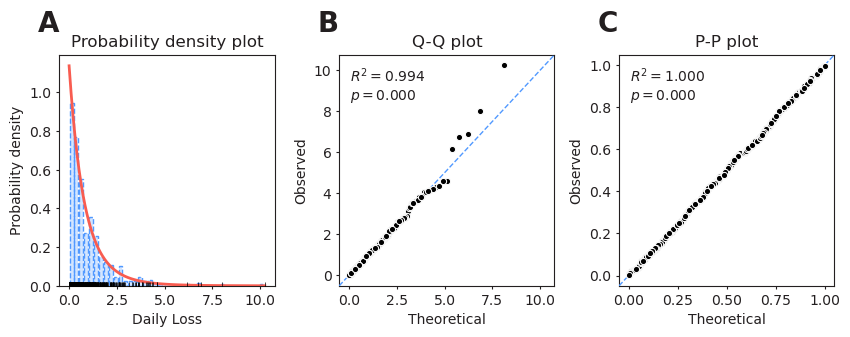

In [59]:
model = EVA2(dataI['Daily Loss']-1.274)
model.get_extremes(method="POT", extremes_type='high', threshold=0)
model.fit_model()
model.plot_diagnostic()

In [38]:
#Table 13
ext = dataI.groupby(pd.Grouper(freq='M')).DailyLoss.max()
c, loc, scale = genextreme.fit(ext.tolist())
DICT_VAR['return level'] = round(genextreme.ppf(1-1/107,c,loc,scale),3)
DICT_VAR['Var_95'] = round(genextreme.ppf(0.95**21,c,loc,scale),3)
DICT_VAR['Var_99'] = round(genextreme.ppf(0.99**21,c,loc,scale),3)
DICT_VAR['ES_95'] = round(C_Var(c, loc, scale, 0.95, 21),3)
DICT_VAR['ES_99'] = round(C_Var(c, loc, scale, 0.99, 21),3)

ext2 = pyextremes.extremes.get_extremes(dataI['Daily Loss'] - 1.5, 'POT', extremes_type='high', threshold=0)
c2, loc2, scale2 = genpareto.fit(ext2.tolist())
DICT_VAR, POT_Q(c2, loc2, scale2, dataI, ext2)

({'return level': 7.462,
  'Var_95': 1.35,
  'Var_99': 2.812,
  'ES_95': 2.606,
  'ES_99': 4.232},
 {'r-107': 7.248,
  'VaR_POT_95': 1.751,
  'VaR_POT_99': 3.382,
  'ES_POT_95': 2.803,
  'ES_POT_99': 4.705})

In [2]:
def hy_test(ext1, distribution1, distribution2):
    def negative_log_likelihood(params, data):
        shape, loc, scale = params
        return -np.sum(distribution1.logpdf(data, shape, loc, scale))

    params_gum = distribution2.fit(ext1)
    params_gum = [0,params_gum[0],params_gum[1]]
    params_gev = distribution1.fit(ext1)
    ext2 = np.array(ext1)
    fit_result_null = minimize(negative_log_likelihood, params_gum, args=(ext2,), method='L-BFGS-B')
    fit_result_full = minimize(negative_log_likelihood, params_gev, args=(ext2,), method='L-BFGS-B')

    # Calculate the likelihood ratio statistic (LRS)
    lrs = 2 * (fit_result_null.fun - fit_result_full.fun)

    # Calculate degrees of freedom (usually equal to 1 for testing location parameter)
    degrees_of_freedom = 1

    # Perform a likelihood ratio test (LRT) using a chi-squared distribution
    
    p_value = 1 - chi2.cdf(lrs, df=degrees_of_freedom)

    # Set significance level (e.g., 0.05)
    alpha = 0.05

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        print("Reject the null hypothesis: shape parameter is not equal to 0")
    else:
        print("Fail to reject the null hypothesis: shape parameter is equal to 0")

def stationary_test(input_data):
    dftest = adfuller(input_data,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]= value


    # Rolling Statistics Test
    index1=input_data
    rmean1=index1.rolling(window=12).mean()
    rstd1=index1.rolling(window=12).std()

    pp =dfoutput.index.tolist()
    pp.reverse()
    kk=[ '%.2f' % elem for elem in dfoutput.tolist() ]
    kk.reverse()
    
    
    # Plot
    data3 = {
        ' ': pp,
        '  ': kk,
            }
    df_example_3 = pd.DataFrame(data3)

    # Create a new figure and axis with a narrower size
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))


    ncols = 2
    nrows = df_example_3.shape[0]

    ax[1].set_xlim(0, ncols)
    ax[1].set_ylim(0, nrows+1)

    # Adjust positions for a narrower table
    positions = [0, 1.8]
    columns = [' ', '  ']

    # Add table's main text
    for i in range(nrows):
        for j, column in enumerate(columns):
            if j == 0:
                ha = 'left'
                text_label = f'{df_example_3[column].iloc[i]}'
                weight = 'normal'
                ax[1].annotate(
                xy=(positions[j], i + .5),
                text=text_label,
                ha=ha,
                va='center',
                weight=weight)
            else:
                ha = 'center'
                text_label = f'{df_example_3[column].iloc[i]}'
                weight = 'normal'
                ax[1].annotate(
                xy=(positions[j], i + .5),
                text=text_label,
                ha=ha,
                va='center',
                weight=weight)
       
       

    # Add column names
    column_names = [' ', '  ']
    for index, c in enumerate(column_names):
            if index == 0:
                ha = 'left'
                ax[1].annotate(
                xy=(positions[index], nrows + .25),
                text=column_names[index],
                ha=ha,
                va='bottom',
                weight='bold')
            else:
                ha = 'center'
                ax[1].annotate(
                xy=(positions[index], nrows + .25),
                text=column_names[index],
                ha=ha,
                va='bottom',
                weight='bold')


    ax[0].plot(index1 , color='black', label='Original',)
    ax[0].plot(rmean1 , color='red',label='Rolling Mean')
    ax[0].plot(rstd1,color='blue',label = 'Rolling Standard Deviation')
    ax[0].legend(loc='lower left')
    ax[0].grid(True)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Daily Loss')
    ax[0].title.set_text("Rolling Statistics Test")
        
    # Add dividing lines
    ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [nrows, nrows], lw=1.95, color='black', marker='', zorder=4)
    ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [0, 0], lw=1.95, color='black', marker='', zorder=4)
    for x in range(1, nrows):
        ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

    ax[1].set_axis_off()
    ax[1].title.set_text('Augmented Dickey-Fuller Test')

    axs = ax.flat
    for n, ax in enumerate(axs):   
        ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes,size=20, weight='bold')
    
    plt.show()



from __future__ import annotations
import calendar
import logging
import typing
import warnings
import matplotlib.gridspec
import matplotlib.pyplot as plt
import scipy.stats
from pyextremes.extremes import ExtremesTransformer, get_extremes, get_return_periods
from pyextremes.models import MLE, Distribution, Emcee, get_model
from pyextremes.plotting import (
    plot_corner,
    plot_extremes,
    plot_probability,
    plot_return_values,
    plot_trace,
    pyextremes_rc,
)
from pyextremes.tests import KolmogorovSmirnov
logger = logging.getLogger(__name__)
from typing import Any, Literal, Optional, Tuple, Union
from pyextremes.extremes.peaks_over_threshold import _generate_clusters
from pyextremes.plotting.style import pyextremes_rc




def _plot_cluster(ax: plt.Axes, cluster: pd.Series) -> None:
    if len(cluster) >= 2:
        ax.axvspan(
            xmin=cluster.index[0],
            xmax=cluster.index[-1],
            alpha=0.25,
            edgecolor="None",
            facecolor="#D1D3D4",
            zorder=2.5,
        )
        for cluster_boundary in [cluster.index[0], cluster.index[-1]]:
            ax.axvline(
                cluster_boundary,
                ls="--",
                lw=0.5,
                color="#D1D3D4",
                zorder=5,
            )


def plot_extreme(
    ts: pd.Series,
    extremes: pd.Series,
    extremes_method: Literal["BM", "POT"],
    extremes_type: Optional[Literal["high", "low"]] = None,
    block_size: Optional[Union[str, pd.Timedelta]] = None,
    threshold: Optional[float] = None,
    r: Optional[Union[pd.Timedelta, Any]] = None,
    figsize: Tuple[float, float] = (8, 5),
    ax: Optional[plt.Axes] = None,
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Plot extreme events.

    Parameters
    ----------
    ts : pandas.Series
        Time series from which `extremes` were extracted.
    extremes : pandas.Series
        Time series of extreme events.
    extremes_method : str
        Extreme value extraction method.
        Supported values:
            BM - Block Maxima
            POT - Peaks Over Threshold
    extremes_type : str, optional
        Type of `extremes`, used only if `extremes_method` is 'POT'
        and `threshold` is not provided.
            high - extreme high values
            low - get low values
    block_size : str or pandas.Timedelta, optional
        Block size, used only if `extremes_method` is 'BM'.
        If None (default), then calculated as median distance between extreme events.
    threshold : float, optional
        Threshold, used only if `extremes_method` is 'POT'.
        If None (default), then is inferred from `extremes` as
        minimum if `extremes_type` is 'high' or maximum if `extremes_type` is 'low'.
    r : pandas.Timedelta or value convertible to timedelta, optional
        Duration of window used to decluster the exceedances.
        See pandas.to_timedelta for more information.
        Used to show clusters. If None (default) then clusters are not shown.
        Clusters are shown only if both `threshold` and `r` were provided.
    figsize : tuple, optional
        Figure size in inches in format (width, height).
        By default it is (8, 5).
    ax : matplotlib.axes._axes.Axes, optional
        Axes onto which extremes plot is drawn.
        If None (default), a new figure and axes objects are created.

    Returns
    -------
    figure : matplotlib.figure.Figure
        Figure object.
    axes : matplotlib.axes._axes.Axes
        Axes object.

    """
    if extremes_method not in ["BM", "POT"]:
        raise ValueError(
            f"invalid value in '{extremes_method}' for the 'extremes_method' argument"
        )

    if extremes_type not in ["high", "low"]:
        raise ValueError(
            f"invalid value in '{extremes_type}' for the 'extremes_type' argument"
        )

    with plt.rc_context(rc=pyextremes_rc):
        # Create figure
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize, dpi=96)
        else:
            try:
                fig = ax.get_figure()
            except AttributeError as _error:
                raise TypeError(
                    f"invalid type in {type(ax)} for the 'ax' argument, "
                    f"must be matplotlib Axes object"
                ) from _error

        # Configure axes
        ax.grid(False)

        # Plot signal time series
        ax.plot(ts.index, ts.values, ls="-", color="black", lw=0.25, zorder=10)

        # Plot extreme events
        ax.scatter(
            extremes.index,
            extremes.values,
            s=20,
            lw=0.5,
            edgecolor="w",
            facecolor="#F85C50",
            zorder=20,
        )

        # Label the axes
        ax.set_xlabel(extremes.index.name or "date-time")
        ax.set_ylabel(extremes.name or "Extreme value")

        if extremes_method == "BM":
            # Infer 'block_size'
            if block_size is None:
                # Calculate 'block_size' as median of distances between extremes
                block_size = pd.to_timedelta(
                    np.quantile(
                        np.diff(extremes.index),
                        0.5,
                    )
                )
            else:
                if not isinstance(block_size, pd.Timedelta):
                    if isinstance(block_size, str):
                        block_size = pd.to_timedelta(block_size)
                    else:
                        raise TypeError(
                            f"invalid type in {type(block_size)} "
                            f"for the 'block_size' argument"
                        )

            # Plot block boundaries
            block_left_boundary = ts.index[0]
            while block_left_boundary < extremes.index.max() + block_size:
                ax.axvline(
                    block_left_boundary, ls="--", lw=0.5, color="#D1D3D4", zorder=5
                )
                block_left_boundary += block_size

        else:
            if threshold is None:
                if extremes_type is None:
                    raise TypeError(
                        "'extremes_type' argument must be provided "
                        "for 'extremes_method' being 'POT' "
                        "when 'threshold' is not provided"
                    )
                if extremes_type == "high":
                    threshold = extremes.min()
                else:
                    threshold = extremes.max()
            else:
                if r is not None:
                    # Plot clusters (only if both threshold and r are provided)
                    if extremes_type == "high":
                        exceedances = ts.loc[ts.values > threshold]
                    else:
                        exceedances = ts.loc[ts.values < threshold]
                    for cluster in _generate_clusters(exceedances=exceedances, r=r):
                        _plot_cluster(ax=ax, cluster=cluster)

            # Plot threshold line
            ax.axhline(threshold, ls="--", lw=1, color="#FF756B", zorder=15)
        fig.autofmt_xdate()

        return fig, ax

class EVA2:
    """
    Extreme Value Analysis (EVA) class.

    This class brings together most of the tools available in the pyextremes package
    bundled together in a pipeline to perform univariate extreme value analysis.

    A typical workflow using the EVA class would consist of the following:
        - extract extreme values (.get_extremes)
        - fit a model (.fit_model)
        - generate outputs (.get_summary)
        - visualize the model (.plot_diagnostic, .plot_return_values)

    Multiple additional graphical and numerical methods are available
    within this class to analyze extracted extreme values, visualize them,
    assess goodness-of-fit of selected model, and to visualize its outputs.
    """

    __slots__ = [
        "__data",
        "__extremes",
        "__extremes_method",
        "__extremes_type",
        "__extremes_kwargs",
        "__extremes_transformer",
        "__model",
    ]

    __data: pd.Series
    __extremes: typing.Optional[pd.Series]
    __extremes_method: typing.Optional[typing.Literal["BM", "POT"]]
    __extremes_type: typing.Optional[typing.Literal["high", "low"]]
    __extremes_kwargs: typing.Optional[typing.Dict[str, typing.Any]]
    __extremes_transformer: typing.Optional[ExtremesTransformer]
    __model: typing.Optional[typing.Union[MLE, Emcee]]

    def __init__(self, data: pd.Series) -> None:
        """
        Initialize EVA model.

        Parameters
        ----------
        data : pandas.Series
            Time series to be analyzed.
            Index must be date-time and values must be numeric.

        """
        # Ensure that `data` is pandas Series
        if not isinstance(data, pd.Series):
            raise TypeError(
                f"invalid type in '{type(data).__name__}' for the `data` argument, "
                f"must be pandas.Series"
            )

        # Copy `data` to ensure the original Series object it is not mutated
        data = data.copy(deep=True)

        # Ensure that `data` has correct index and value dtypes
        if not np.issubdtype(data.dtype, np.number):
            try:
                message = "`data` values are not numeric - converting to numeric"
                logger.debug(message)
                warnings.warn(message=message, category=RuntimeWarning)
                data = data.astype(np.float64)
            except ValueError as _error:
                raise TypeError(
                    f"invalid dtype in {data.dtype} for the `data` argument, "
                    f"must be numeric (subdtype of numpy.number)"
                ) from _error
        if not isinstance(data.index, pd.DatetimeIndex):
            raise TypeError(
                f"index of `data` must be a sequence of date-time objects, "
                f"not {data.index.inferred_type}"
            )

        # Ensure `data` doesn't have duplicate indices
        if (n_duplicates := len(data) - len(data.index.drop_duplicates())) > 0:
            message = (
                f"{n_duplicates:,d} duplicate indices found in `data` "
                "- removing duplicate entries"
            )
            logger.debug(message)
            warnings.warn(message=message, category=RuntimeWarning)
            data = data.groupby(data.index).first()

        # Ensure that `data` is sorted
        if not data.index.is_monotonic_increasing:
            message = (
                "`data` index is not sorted in ascending order - "
                "sorting `data` by index"
            )
            logger.debug(message)
            warnings.warn(message=message, category=RuntimeWarning)
            data = data.sort_index(ascending=True)

        # Ensure that `data` has no invalid entries
        n_nans = data.isna().sum()
        if n_nans > 0:
            message = (
                f"{n_nans:,d} Null values found in `data` - removing invalid entries"
            )
            logger.debug(message)
            warnings.warn(message=message, category=RuntimeWarning)
            data = data.dropna()

        # Set the `data` attribute
        self.__data: pd.Series = data

        # Initialize attributes related to extreme value extraction
        self.__extremes = None
        self.__extremes_method = None
        self.__extremes_type = None
        self.__extremes_kwargs = None
        self.__extremes_transformer = None

        # Initialize attributes related to model fitting
        self.__model = None

        logger.info("successfully initialized EVA object")

    @property
    def data(self) -> pd.Series:
        return self.__data

    @property
    def extremes(self) -> pd.Series:
        if self.__extremes is None:
            raise AttributeError(
                "extreme values must first be extracted "
                "using the '.get_extremes' method"
            )
        return self.__extremes

    @property
    def extremes_method(self) -> typing.Literal["BM", "POT"]:
        if self.__extremes_method is None:
            raise AttributeError(
                "extreme values must first be extracted "
                "using the '.get_extremes' method"
            )
        return self.__extremes_method

    @property
    def extremes_type(self) -> typing.Literal["high", "low"]:
        if self.__extremes_type is None:
            raise AttributeError(
                "extreme values must first be extracted "
                "using the '.get_extremes' method"
            )
        return self.__extremes_type

    @property
    def extremes_kwargs(self) -> typing.Dict[str, typing.Any]:
        if self.__extremes_kwargs is None:
            raise AttributeError(
                "extreme values must first be extracted "
                "using the '.get_extremes' method"
            )
        return self.__extremes_kwargs

    @property
    def extremes_transformer(self) -> ExtremesTransformer:
        if self.__extremes_transformer is None:
            raise AttributeError(
                "extreme values must first be extracted "
                "using the '.get_extremes' method"
            )
        return self.__extremes_transformer

    @property
    def model(self) -> typing.Union[MLE, Emcee]:
        if self.__model is None:
            raise AttributeError(
                "model must first be assigned using the '.fit_model' method"
            )
        return self.__model

    @property
    def distribution(self) -> Distribution:
        return self.model.distribution

    @property
    def loglikelihood(self) -> float:
        return self.model.loglikelihood

    @property
    def AIC(self) -> float:
        return self.model.AIC

    def test_ks(self, significance_level: float = 0.05) -> KolmogorovSmirnov:
        return KolmogorovSmirnov(
            extremes=self.extremes_transformer.transformed_extremes,
            distribution=self.distribution.distribution,
            fit_parameters={
                **self.model.fit_parameters,
                **self.model.distribution._fixed_parameters,
            },
            significance_level=significance_level,
        )

    def __repr__(self) -> str:
        # Width of repr block
        width = 88

        # Separator used to separate two columns of the repr block
        sep = " " * 6

        # Widths of left and right columns
        lwidth = (width - len(sep)) // 2
        rwidth = width - (lwidth + len(sep))

        # Function used to convert label-value pair
        # into a sequence of lines within a column
        def align_text(label: str, value: str, position: str) -> typing.List[str]:
            assert position in ["left", "right"]
            if label == "":
                if position == "left":
                    return [f"{value:>{lwidth}}"]
                return [f"{value:>{rwidth}}"]

            # Find width available for the value
            # (+2 stands for colon and space (label: value))
            label_width = len(label) + 2
            if position == "left":
                free_width = lwidth - label_width
            else:
                free_width = rwidth - label_width

            # Split value into chunks using 'free_width'
            value_chunks = [
                value[i : i + free_width] for i in range(0, len(value), free_width)
            ]

            # Collect text row-by-row using 'value_chunks'
            aligned_text = [f"{label}: {value_chunks[0]:>{free_width}}"]
            try:
                for chunk in value_chunks[1:]:
                    aligned_text.append(
                        "".join(
                            [
                                " " * label_width,
                                f"{chunk:>{free_width}}",
                            ]
                        )
                    )
            except IndexError:
                pass
            return aligned_text

        # Function used to convert two label-value pairs
        # into a sequence of rows representing two columns
        def align_pair(
            label: typing.Tuple[str, str],
            value: typing.Tuple[str, str],
        ) -> str:
            parts = [
                align_text(lbl, val, pos)
                for lbl, val, pos in zip(label, value, ("left", "right"))
            ]
            while len(parts[0]) != len(parts[1]):
                shorter_part_index = 0 if len(parts[0]) < len(parts[1]) else 1
                parts[shorter_part_index].append(
                    " " * len(parts[shorter_part_index][0])
                )
            return "\n".join([sep.join([left, right]) for left, right in zip(*parts)])

        # Create summary header
        start_date = (
            f"{calendar.month_name[self.data.index[0].month]} "
            f"{self.data.index[0].year}"
        )
        end_date = (
            f"{calendar.month_name[self.data.index[-1].month]} "
            f"{self.data.index[-1].year}"
        )
        summary = [
            "Univariate Extreme Value Analysis".center(width),
            "=" * width,
            "Source Data".center(width),
            "-" * width,
            align_pair(
                ("Data label", "Size"),
                (str(self.data.name), f"{len(self.data):,d}"),
            ),
            align_pair(
                ("Start", "End"),
                (start_date, end_date),
            ),
            "=" * width,
        ]

        # Fill the extremes section
        summary.extend(
            [
                "Extreme Values".center(width),
                "-" * width,
            ]
        )
        try:
            if self.extremes_method == "BM":
                ev_parameters = (
                    "Block size",
                    str(self.extremes_kwargs["block_size"]),
                )
            elif self.extremes_method == "POT":
                ev_parameters = (
                    "Threshold",
                    str(self.extremes_kwargs["threshold"]),
                )
            else:
                raise AssertionError
            summary.extend(
                [
                    align_pair(
                        ("Count", "Extraction method"),
                        (f"{len(self.extremes):,d}", self.extremes_method),
                    ),
                    align_pair(
                        ("Type", ev_parameters[0]),
                        (self.extremes_type, ev_parameters[1]),
                    ),
                ]
            )
        except AttributeError:
            summary.append("Extreme values have not been extracted")
        summary.append("=" * width)

        # Fill the model section
        summary.extend(
            [
                "Model".center(width),
                "-" * width,
            ]
        )
        try:
            summary.append(
                align_pair(
                    ("Model", "Distribution"),
                    (self.model.name, self.model.distribution.name),
                )
            )
            if self.model.name == "Emcee":
                n_walkers = getattr(self.model, "n_walkers")
                n_samples = getattr(self.model, "n_samples")
                summary.append(
                    align_pair(
                        ("Walkers", "Samples per walker"),
                        (f"{n_walkers:,d}", f"{n_samples:,d}"),
                    )
                )

            summary.append(
                align_pair(
                    ("Log-likelihood", "AIC"),
                    (f"{self.model.loglikelihood:.3f}", f"{self.model.AIC:.3f}"),
                )
            )

            summary.append("-" * width)

            free_parameters = [
                f"{parameter}={self.model.fit_parameters[parameter]:.3f}"
                for parameter in self.model.distribution.free_parameters
            ]
            fixed_parameters = [
                f"{key}={value:.3f}"
                for key, value in self.model.distribution.fixed_parameters.items()
            ]
            if len(fixed_parameters) == 0:
                fixed_parameters = ["All parameters are free"]
            delta_parameters = len(free_parameters) - len(fixed_parameters)
            if delta_parameters < 0:
                for _ in range(-delta_parameters):
                    free_parameters.append("")
            else:
                for _ in range(delta_parameters):
                    fixed_parameters.append("")

            for i, (frp, fip) in enumerate(zip(free_parameters, fixed_parameters)):
                if i == 0:
                    summary.append(
                        align_pair(
                            ("Free parameters", "Fixed parameters"),
                            (frp, fip),
                        )
                    )
                else:
                    summary.append(
                        align_pair(
                            ("", ""),
                            (frp, fip),
                        )
                    )

        except AttributeError:
            summary.append("Model has not been fit to the extremes")

        summary.append("=" * width)

        return "\n".join(summary)

    @typing.overload
    def get_extremes(
        self,
        method: typing.Literal["BM"],
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        block_size: str = "365.2425D",
        errors: typing.Literal["raise", "ignore", "coerce"] = "raise",
        min_last_block: typing.Optional[float] = None,
    ) -> None:
        ...

    @typing.overload
    def get_extremes(
        self,
        method: typing.Literal["POT"],
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        threshold: float,
        r: typing.Union[pd.Timedelta, typing.Any] = "24H",
    ) -> None:
        ...

    def get_extremes(
        self,
        method: typing.Literal["BM", "POT"],
        extremes_type: typing.Literal["high", "low"] = "high",
        **kwargs,
    ) -> None:
        """
        Get extreme events from time series.

        Extracts extreme values from the 'self.data' attribute.
        Stores extreme values in the 'self.extremes' attribute.

        Parameters
        ----------
        method : str
            Extreme value extraction method.
            Supported values:
                BM - Block Maxima
                POT - Peaks Over Threshold
        extremes_type : str, optional
            high (default) - get extreme high values
            low - get extreme low values
        kwargs
            if method is BM:
                block_size : str or pandas.Timedelta, optional
                    Block size (default='365.2425D').
                    See pandas.to_timedelta for more information.
                errors : str, optional
                    raise (default) - raise an exception
                        when encountering a block with no data
                    ignore - ignore blocks with no data
                    coerce - get extreme values for blocks with no data
                        as mean of all other extreme events in the series
                        with index being the middle point of corresponding interval
                min_last_block : float, optional
                    Minimum data availability ratio (0 to 1) in the last block
                    for it to be used to extract extreme value from.
                    This is used to discard last block when it is too short.
                    If None (default), last block is always used.
            if method is POT:
                threshold : float
                    Threshold used to find exceedances.
                r : pandas.Timedelta or value convertible to timedelta, optional
                    Duration of window used to decluster the exceedances.
                    By default r='24H' (24 hours).
                    See pandas.to_timedelta for more information.

        """
        message = f"for method='{method}' and extremes_type='{extremes_type}'"
        logger.debug("extracting extreme values %s", message)
        self.__extremes = get_extremes(
            method=method,
            ts=self.data,
            extremes_type=extremes_type,
            **kwargs,
        )
        self.__extremes_method = method
        self.__extremes_type = extremes_type
        logger.info("successfully extracted extreme values %s", message)

        logger.debug("collecting extreme value properties")
        self.__extremes_kwargs = {}
        if method == "BM":
            self.__extremes_kwargs["block_size"] = pd.to_timedelta(
                kwargs.get("block_size", "365.2425D")
            )
            self.__extremes_kwargs["errors"] = kwargs.get("errors", "raise")
            self.__extremes_kwargs["min_last_block"] = kwargs.get(
                "min_last_block", None
            )
        else:
            self.__extremes_kwargs["threshold"] = kwargs.get("threshold")
            self.__extremes_kwargs["r"] = pd.to_timedelta(kwargs.get("r", "24H"))
        logger.info("successfully collected extreme value properties")

        logger.debug("creating extremes transformer")
        self.__extremes_transformer = ExtremesTransformer(
            extremes=self.__extremes,
            extremes_type=self.__extremes_type,
        )
        logger.info("successfully created extremes transformer")

        logger.info("removing any previously declared models")
        self.__model = None

    @typing.overload
    def set_extremes(
        self,
        extremes: pd.Series,
        method: typing.Literal["BM"] = "BM",
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        block_size: str = "365.2425D",
        errors: typing.Literal["raise", "ignore", "coerce"] = "raise",
        min_last_block: typing.Optional[float] = None,
    ) -> None:
        ...

    @typing.overload
    def set_extremes(
        self,
        extremes: pd.Series,
        method: typing.Literal["POT"] = "POT",
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        threshold: float,
        r: typing.Union[pd.Timedelta, typing.Any] = "24H",
    ) -> None:
        ...

    def set_extremes(
        self,
        extremes: pd.Series,
        method: typing.Literal["BM", "POT"] = "BM",
        extremes_type: typing.Literal["high", "low"] = "high",
        **kwargs,
    ) -> None:
        """
        Set extreme values.

        This method is used to set extreme values onto the model instead
        of deriving them from data directly using the 'get_extremes' method.
        This way user can set extremes calculated using a custom methodology.

        Parameters
        ----------
        extremes : pd.Series
            Time series of extreme values to be set onto the model.
            Must be numeric, have date-time index, and have the same name
            as self.data.
        method : str, optional
            Extreme value extraction method.
            Supported values:
                BM (default) - Block Maxima
                POT - Peaks Over Threshold
        extremes_type : str, optional
            high (default) - extreme high values
            low - extreme low values
        kwargs:
            if method is BM:
                block_size : str or pandas.Timedelta, optional
                    Block size.
                    If None (default), then is calculated as median distance
                    between extreme events.
                errors : str, optional
                    raise - raise an exception
                        when encountering a block with no data
                    ignore (default) - ignore blocks with no data
                    coerce - get extreme values for blocks with no data
                        as mean of all other extreme events in the series
                        with index being the middle point of corresponding interval
                min_last_block : float, optional
                    Minimum data availability ratio (0 to 1) in the last block
                    for it to be used to extract extreme value from.
                    This is used to discard last block when it is too short.
                    If None (default), last block is always used.
            if method is POT:
                threshold : float, optional
                    Threshold used to find exceedances.
                    By default is taken as smallest value.
                r : pandas.Timedelta or value convertible to timedelta, optional
                    Duration of window used to decluster the exceedances.
                    By default r='24H' (24 hours).
                    See pandas.to_timedelta for more information.

        """
        # Validate `extremes`
        if not isinstance(extremes, pd.Series):
            raise TypeError(
                f"invalid type in '{type(extremes).__name__}' for the `extremes` "
                f"argument, must be pandas.Series"
            )
        extremes = extremes.copy(deep=True)
        if not isinstance(extremes.index, pd.DatetimeIndex):
            raise TypeError("invalid index type for `extremes`, must be date-time")
        if not np.issubdtype(extremes.dtype, np.number):
            raise TypeError("`extremes` must have numeric values")
        if extremes.name is None:
            extremes.name = self.data.name
        else:
            if extremes.name != self.data.name:
                raise ValueError("`extremes` name doesn't match that of `data`")
        if (
            extremes.index.min() < self.data.index.min()
            or extremes.index.max() > self.data.index.max()
        ):
            raise ValueError("`extremes` time range must fit within that of data")

        # Get `method`
        if method not in ["BM", "POT"]:
            raise ValueError(f"`method` must be either 'BM' or 'POT', not '{method}'")

        # Get `extremes_type`
        if extremes_type not in ["high", "low"]:
            raise ValueError(
                f"`extremes_type` must be either 'BM' or 'POT', not '{extremes_type}'"
            )

        # Get `extremes_kwargs`
        extremes_kwargs = {}
        if method == "BM":
            # Get `block_size`
            extremes_kwargs["block_size"] = pd.to_timedelta(
                kwargs.pop(
                    "block_size",
                    pd.to_timedelta(np.quantile(np.diff(extremes.index), 0.5)),
                )
            )
            if extremes_kwargs["block_size"] <= pd.to_timedelta("0D"):
                raise ValueError(
                    "`block_size` must be a positive timedelta, not %s"
                    % extremes_kwargs["block_size"]
                )

            # Get `errors`
            extremes_kwargs["errors"] = kwargs.pop("errors", "ignore")
            if extremes_kwargs["errors"] not in ["raise", "ignore", "coerce"]:
                raise ValueError(
                    f"invalid value in '{extremes_kwargs['errors']}' "
                    f"for the `errors` argument"
                )

            # Get `min_last_block`
            extremes_kwargs["min_last_block"] = kwargs.pop("min_last_block", None)
            if extremes_kwargs["min_last_block"] is not None:
                if not 0 <= extremes_kwargs["min_last_block"] <= 1:
                    raise ValueError(
                        "`min_last_block` must be a number in the [0, 1] range"
                    )

        else:
            # Get `threshold`
            extremes_kwargs["threshold"] = kwargs.pop(
                "threshold",
                {
                    "high": extremes.min(),
                    "low": extremes.max(),
                }[extremes_type],
            )
            if (
                extremes_type == "high"
                and extremes_kwargs["threshold"] > extremes.values.min()
            ) or (
                extremes_type == "low"
                and extremes_kwargs["threshold"] < extremes.values.max()
            ):
                raise ValueError("invalid `threshold` value")

            # Get `r`
            extremes_kwargs["r"] = pd.to_timedelta(kwargs.pop("r", "24H"))
            if extremes_kwargs["r"] <= pd.to_timedelta("0D"):
                raise ValueError(
                    "`r` must be a positive timedelta, not %s" % extremes_kwargs["r"]
                )

        # Check for unrecognized kwargs
        if len(kwargs) != 0:
            raise TypeError(
                f"unrecognized arguments passed in: {', '.join(kwargs.keys())}"
            )

        # Set attributes
        self.__extremes = extremes
        self.__extremes_method = method
        self.__extremes_type = extremes_type
        self.__extremes_kwargs = extremes_kwargs
        self.__extremes_transformer = ExtremesTransformer(
            extremes=self.__extremes,
            extremes_type=self.__extremes_type,
        )
        self.__model = None
        logger.info("successfully set extremes")

    @typing.overload
    @classmethod
    def from_extremes(
        cls,
        extremes: pd.Series,
        method: typing.Literal["BM"] = "BM",
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        block_size: str = "365.2425D",
        errors: typing.Literal["raise", "ignore", "coerce"] = "raise",
        min_last_block: typing.Optional[float] = None,
    ) -> None:
        ...

    @typing.overload
    @classmethod
    def from_extremes(
        cls,
        extremes: pd.Series,
        method: typing.Literal["POT"] = "POT",
        extremes_type: typing.Literal["high", "low"] = "high",
        *,
        threshold: float,
        r: typing.Union[pd.Timedelta, typing.Any] = "24H",
    ) -> None:
        ...

    @classmethod
    def from_extremes(
        cls,
        extremes: pd.Series,
        method: typing.Literal["BM", "POT"] = "BM",
        extremes_type: typing.Literal["high", "low"] = "high",
        **kwargs,
    ) -> EVA:
        """
        Create an EVA model using pre-defined `extremes`.

        A typical reason to use this method is when full timeseries is not available
        and only the extracted extremes (i.e. annual maxima) are known.

        Parameters
        ----------
        extremes : pd.Series
            Time series of extreme values.
        method : str, optional
            Extreme value extraction method.
            Supported values:
                BM (default) - Block Maxima
                POT - Peaks Over Threshold
        extremes_type : str, optional
            high (default) - extreme high values
            low - extreme low values
        kwargs:
            if method is BM:
                block_size : str or pandas.Timedelta, optional
                    Block size.
                    If None (default), then is calculated as median distance
                    between extreme events.
                errors : str, optional
                    raise - raise an exception
                        when encountering a block with no data
                    ignore (default) - ignore blocks with no data
                    coerce - get extreme values for blocks with no data
                        as mean of all other extreme events in the series
                        with index being the middle point of corresponding interval
                min_last_block : float, optional
                    Minimum data availability ratio (0 to 1) in the last block
                    for it to be used to extract extreme value from.
                    This is used to discard last block when it is too short.
                    If None (default), last block is always used.
            if method is POT:
                threshold : float, optional
                    Threshold used to find exceedances.
                    By default is taken as smallest value.
                r : pandas.Timedelta or value convertible to timedelta, optional
                    Duration of window used to decluster the exceedances.
                    By default r='24H' (24 hours).
                    See pandas.to_timedelta for more information.

        Returns
        -------
        EVA
            EVA model initialized with `extremes`.

        """
        model = cls(data=extremes)
        model.set_extremes(
            extremes=model.data,
            method=method,
            extremes_type=extremes_type,
            **kwargs,
        )
        return model

    def plot_extremes(
        self,
        figsize: tuple = (8, 5),
        ax: typing.Optional[plt.Axes] = None,
        show_clusters: bool = False,
    ) -> typing.Tuple[plt.Figure, plt.Axes]:  # pragma: no cover
        """
        Plot extreme events.

        Parameters
        ----------
        figsize : tuple, optional
            Figure size in inches in format (width, height).
            By default it is (8, 5).
        ax : matplotlib.axes._axes.Axes, optional
            Axes onto which extremes plot is drawn.
            If None (default), a new figure and axes objects are created.
        show_clusters : bool, optional
            If True, show cluster boundaries for POT extremes.
            Has no effect if extremes were extracted using BM method.
            May produce wrong cluster boundaries if extremes were set using the
            `set_extremes` or `from_extremes` methods and threshold and inter-cluster
            distance (r) arguments were not provided.
            By default is False.

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : matplotlib.axes._axes.Axes
            Axes object.

        """
        return plot_extreme(
            ts=self.data,
            extremes=self.extremes,
            extremes_method=self.extremes_method,
            extremes_type=self.extremes_type,
            block_size=self.extremes_kwargs.get("block_size", None),
            threshold=self.extremes_kwargs.get("threshold", None),
            r=self.extremes_kwargs.get("r", None) if show_clusters else None,
            figsize=figsize,
            ax=ax,
        )

    @typing.overload
    def fit_model(
        self,
        model: typing.Literal["MLE"] = "MLE",
        distribution: typing.Union[str, scipy.stats.rv_continuous] = None,
        distribution_kwargs: typing.Optional[dict] = None,
    ) -> None:
        ...

    @typing.overload
    def fit_model(
        self,
        model: typing.Literal["Emcee"] = "Emcee",
        distribution: typing.Union[str, scipy.stats.rv_continuous] = None,
        distribution_kwargs: typing.Optional[dict] = None,
        n_walkers: int = 100,
        n_samples: int = 500,
        progress: bool = False,
    ) -> None:
        ...

    def fit_model(
        self,
        model: typing.Literal["MLE", "Emcee"] = "MLE",
        distribution: typing.Union[str, scipy.stats.rv_continuous] = None,
        distribution_kwargs: typing.Optional[dict] = None,
        **kwargs,
    ) -> None:
        """
        Fit a model to the extracted extreme values.

        Parameters
        ----------
        model : str, optional
            Name of model. By default it is 'MLE'.
            Name of model.
            Supported models:
                MLE - Maximum Likelihood Estimate (MLE) model.
                    Based on 'scipy' package (scipy.stats.rv_continuous.fit).
                Emcee - Markov Chain Monte Carlo (MCMC) model.
                    Based on 'emcee' package by Daniel Foreman-Mackey.
        distribution : str or scipy.stats.rv_continuous, optional
            Distribution name compatible with scipy.stats
            or a subclass of scipy.stats.rv_continuous.
            See https://docs.scipy.org/doc/scipy/reference/stats.html
            By default the distribution is selected automatically
            as best between 'genextreme' and 'gumbel_r' for 'BM' extremes
            and 'genpareto' and 'expon' for 'POT' extremes.
            Best distribution is selected using the AIC metric.
        distribution_kwargs : dict, optional
            Special keyword arguments, passed to the `.fit` method of the distribution.
            These keyword arguments represent parameters to be held fixed.
            Names of parameters to be fixed must have 'f' prefixes. Valid parameters:
                - shape(s): 'fc', e.g. fc=0
                - location: 'floc', e.g. floc=0
                - scale: 'fscale', e.g. fscale=1
            See documentation of a specific scipy.stats distribution
            for names of available parameters.
            By default, location parameter for 'genpareto' and 'expon' distributions
            is fixed to threshold (POT) or to minimum extremes (BM) value.
            Set to empty dictionary (distribution_kwargs={}) to avoid this behaviour.
        kwargs
            Keyword arguments passed to a model .fit method.
            MLE model:
                MLE model takes no additional arguments.
            Emcee model:
                n_walkers : int, optional
                    The number of walkers in the ensemble (default=100).
                n_samples : int, optional
                    The number of steps to run (default=500).
                progress : bool or str, optional
                    If True, a progress bar will be shown as the sampler progresses.
                    If a string, will select a specific tqdm progress bar.
                    Most notable is 'notebook', which shows a progress bar
                    suitable for Jupyter notebooks.
                    If False (default), no progress bar will be shown.
                    This progress bar is a part of the `emcee` package.

        """
        # Select default distribution
        if distribution is None:
            logger.debug(
                "selecting default distribution for extremes extracted using the "
                "'%s' method",
                self.extremes_method,
            )

            # Prepare list of candidate distributions
            if self.extremes_method == "BM":
                candidate_distributions = ["genextreme", "gumbel_r"]
                _distribution_kwargs = None
            elif self.extremes_method == "POT":
                candidate_distributions = ["genpareto", "expon"]
                _distribution_kwargs = {
                    "floc": self.extremes_kwargs.get(
                        "threshold",
                        self.extremes_transformer.transformed_extremes.min(),
                    )
                }
            else:
                raise AssertionError

            # Fit MLE model for candidate distributions
            # and select distribution with smallest AIC
            distribution = None
            aic = np.inf
            for distribution_name in candidate_distributions:
                new_aic = MLE(
                    extremes=self.extremes_transformer.transformed_extremes,
                    distribution=distribution_name,
                    distribution_kwargs=_distribution_kwargs,
                ).AIC
                if new_aic < aic:
                    distribution = distribution_name
                    aic = new_aic
            logger.info(
                "selected '%s' distribution with AIC score %s",
                distribution,
                aic,
            )

        # Get distribution name
        if isinstance(distribution, str):
            distribution_name = distribution
        elif isinstance(distribution, scipy.stats.rv_continuous):
            distribution_name = getattr(distribution, "name", None)
        else:
            raise TypeError(
                f"invalid type in {type(distribution)} "
                f"for the 'distribution' argument, "
                f"must be string or scipy.stats.rv_continuous"
            )

        # Checking if distribution is valid per extreme value theory:
        # Fisher-Tippet-Gnedenko theorem for 'BM'
        # Pickands–Balkema–de Haan theorem for 'POT'
        if distribution_name is None:
            warnings.warn(
                message=(
                    "provided distribution 'name' attribute cannot be resolved "
                    "and distribution validity cannot be verified"
                ),
                category=RuntimeWarning,
            )
        else:
            if self.extremes_method == "BM" and distribution_name not in [
                "genextreme",
                "gumbel_r",
            ]:
                warnings.warn(
                    message=(
                        f"'{distribution_name}' distribution is not "
                        f"recommended to be used with extremes extracted "
                        f"using the 'BM' method, 'genextreme' or 'gumebel_r' "
                        f"should be used per the Fisher-Tippet-Gnedenko theorem"
                    ),
                    category=RuntimeWarning,
                )
            elif self.extremes_method == "POT" and distribution_name not in [
                "genpareto",
                "expon",
            ]:
                warnings.warn(
                    message=(
                        f"'{distribution_name}' distribution is not "
                        f"recommended to be used with extremes extracted "
                        f"using the 'POT' method, 'genpareto' or 'expon' "
                        f"should be used per the Pickands–Balkema–de Haan theorem"
                    ),
                    category=RuntimeWarning,
                )

        # Freeze (fix) location parameter for genpareto/expon distributions
        if distribution_kwargs is None and distribution_name in ["genpareto", "expon"]:
            distribution_kwargs = {
                "floc": self.extremes_kwargs.get(
                    "threshold", self.extremes_transformer.transformed_extremes.min()
                )
            }
            logger.debug(
                "freezing location parameter (floc) at %s for '%s' distribution",
                distribution_kwargs["floc"],
                distribution_name,
            )

        # Fit model to transformed extremes
        self.__model = get_model(
            model=model,
            extremes=self.extremes_transformer.transformed_extremes,
            distribution=distribution,
            distribution_kwargs=distribution_kwargs,
            **kwargs,
        )

    def _get_mcmc_plot_inputs(
        self,
        labels: typing.Optional[typing.List[str]] = None,
    ) -> tuple:  # pragma: no cover
        try:
            trace = self.model.trace
            trace_map = tuple(
                self.model.fit_parameters[parameter]
                
                for parameter in self.model.distribution.free_parameters
            )
        except TypeError as _error:
            raise TypeError(
                f"this method is only applicable to MCMC-like models, "
                f"not to '{self.model.name}' model"
            ) from _error

        parameter_names = {
            "loc": r"Location, $\mu$",
            "scale": r"Scale, $\sigma$",
        }
        if self.model.distribution.name in ["genextreme", "genpareto"]:
            parameter_names["c"] = r"Shape, $\xi$"
        if labels is None:
            labels = []
            for parameter in self.model.distribution.free_parameters:
                try:
                    labels.append(parameter_names[parameter])
                except KeyError:
                    labels.append(f"Shape parameter '{parameter}'")

        return trace, trace_map, labels

    def plot_trace(
        self,
        burn_in: int = 0,
        labels: typing.Optional[typing.List[str]] = None,
        figsize: typing.Optional[typing.Tuple[float, float]] = None,
    ) -> typing.Tuple[plt.Figure, list]:  # pragma: no cover
        """
        Plot trace plot for MCMC sampler trace.

        Parameters
        ----------
        burn_in : int, optional
            Burn-in value (number of first steps to discard for each walker).
            By default it is 0 (no values are discarded).
        labels : array-like, optional
            Sequence of strings with parameter names, used to label axes.
            If None (default), then axes are labeled sequentially.
        figsize : tuple, optional
            Figure size in inches.
            If None (default), then figure size is calculated automatically
            as 8 by 2 times number of parameters.

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : list
            List with n_parameters Axes objects.

        """
        trace, trace_map, labels = self._get_mcmc_plot_inputs(labels=labels)
        return plot_trace(
            trace=trace,
            trace_map=trace_map,
            burn_in=burn_in,
            labels=labels,
            figsize=figsize,
        )

    def plot_corner(
        self,
        burn_in: int = 0,
        labels: typing.Optional[typing.List[str]] = None,
        levels: typing.Optional[int] = None,
        figsize: typing.Tuple[float, float] = (8, 8),
    ) -> typing.Tuple[plt.Figure, list]:  # pragma: no cover
        """
        Plot corner plot for MCMC sampler trace.

        Parameters
        ----------
        burn_in : int, optional
            Burn-in value (number of first steps to discard for each walker).
            By default it is 0 (no values are discarded).
        labels : array-like, optional
            Sequence of strings with parameter names, used to label axes.
            If None (default), then axes are labeled sequentially.
        levels : int, optional
            Number of Gaussian KDE contours to plot.
            If None (default), then not shown.
        figsize : tuple, optional
            Figure size in inches. By default it is (8, 8).

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : list
            2D list with Axes objects of size N by N, where N is `trace.shape[2]`.
            Empty slots are represented by None. Axes are ordered from left to right
            top to bottom.

        """
        trace, trace_map, labels = self._get_mcmc_plot_inputs(labels=labels)
        return plot_corner(
            trace=trace,
            trace_map=trace_map,
            burn_in=burn_in,
            labels=labels,
            levels=levels,
            figsize=figsize,
        )

    def get_return_value(
        self,
        return_period,
        return_period_size: typing.Union[str, pd.Timedelta] = "365.2425D",
        alpha: typing.Optional[float] = None,
        **kwargs,
    ) -> tuple:
        """
        Get return value and confidence interval for given return period(s).

        Parameters
        ----------
        return_period : array-like
            Return period or 1D array of return periods.
            Given as a multiple of `return_period_size`.
        return_period_size : str or pandas.Timedelta, optional
            Size of return periods (default='365.2425D').
            If set to '30D', then a return period of 12
            would be roughly equivalent to a 1 year return period (360 days).
        alpha : float, optional
            Width of confidence interval (0, 1).
            If None (default), return None
            for upper and lower confidence interval bounds.
        kwargs
            Model-specific keyword arguments.
            If alpha is None, keyword arguments are ignored
            (error still raised for unrecognized arguments).
            MLE model:
                n_samples : int, optional
                    Number of bootstrap samples used to estimate
                    confidence interval bounds (default=100).
            Emcee model:
                burn_in : int
                    Burn-in value (number of first steps to discard for each walker).

        Returns
        -------
        return_value : array-like
            Return values.
        ci_lower : array-like
            Lower confidence interval bounds.
        ci_upper : array-like
            Upper confidence interval bounds.

        """
        # Parse the 'return_period_size' argument
        if not isinstance(return_period_size, pd.Timedelta):
            if isinstance(return_period_size, str):
                return_period_size = pd.to_timedelta(return_period_size)
            else:
                raise TypeError(
                    f"invalid type in {type(return_period_size)} "
                    f"for the 'return_period_size' argument"
                )

        # Calculate rate of extreme events
        # as number of extreme events per `return_period_size`
        if self.extremes_method == "BM":
            extremes_rate = return_period_size / self.extremes_kwargs["block_size"]
        elif self.extremes_method == "POT":
            n_periods = (self.data.index[-1] - self.data.index[0]) / return_period_size
            extremes_rate = len(self.extremes) / n_periods
        else:
            raise AssertionError

        # Convert 'return_period' to ndarray
        return_period = np.asarray(a=return_period, dtype=np.float64).copy()
        if return_period.ndim == 0:
            return_period = return_period[np.newaxis]
        if return_period.ndim != 1:
            raise ValueError(
                f"invalid shape in {return_period.shape} "
                f"for the 'return_period' argument, must be 1D array"
            )

        # Calculate exceedance probability
        exceedance_probability = 1 / return_period / extremes_rate

        # Calculate return values
        return tuple(
            self.extremes_transformer.transform(value)
            for value in self.model.get_return_value(
                exceedance_probability=exceedance_probability, alpha=alpha, **kwargs
            )
        )

    def get_summary(
        self,
        return_period,
        return_period_size: typing.Union[str, pd.Timedelta] = "365.2425D",
        alpha: typing.Optional[float] = None,
        **kwargs,
    ) -> pd.DataFrame:
        """
        Generate a pandas DataFrame with return values and confidence interval bounds.

        Parameters
        ----------
        return_period : array-like
            Return period or 1D array of return periods.
            Given as a multiple of `return_period_size`.
        return_period_size : str or pandas.Timedelta, optional
            Size of return periods (default='365.2425D').
            If set to '30D', then a return period of 12
            would be roughly equivalent to a 1 year return period (360 days).
        alpha : float, optional
            Width of confidence interval (0, 1).
            If None (default), return None
            for upper and lower confidence interval bounds.
        kwargs
            Model-specific keyword arguments.
            If alpha is None, keyword arguments are ignored
            (error still raised for unrecognized arguments).
            MLE model:
                n_samples : int, optional
                    Number of bootstrap samples used to estimate
                    confidence interval bounds (default=100).
            Emcee model:
                burn_in : int
                    Burn-in value (number of first steps to discard for each walker).

        Returns
        -------
        summary : pandas.DataFrame
            DataFrame with return values and confidence interval bounds.

        """
        # Convert 'return_period' to ndarray
        return_period = np.asarray(a=return_period, dtype=np.float64).copy()
        if return_period.ndim == 0:
            return_period = return_period[np.newaxis]
        if return_period.ndim != 1:
            raise ValueError(
                f"invalid shape in {return_period.shape} "
                f"for the 'return_period' argument, must be 1D array"
            )

        # Calculate return values
        rv = self.get_return_value(
            return_period=return_period,
            return_period_size=return_period_size,
            alpha=alpha,
            **kwargs,
        )
        return_values = []
        for value in rv:
            value = np.asarray(a=value, dtype=np.float64)
            if value.ndim == 0:
                value = value[np.newaxis]
            return_values.append(value)

        return pd.DataFrame(
            data=np.transpose(return_values),
            index=pd.Index(data=return_period, name="return period"),
            columns=["return value", "lower ci", "upper ci"],
        )

    def plot_return_values(
        self,
        return_period=None,
        return_period_size: typing.Union[str, pd.Timedelta] = "365.2425D",
        alpha: typing.Optional[float] = None,
        plotting_position: typing.Literal[
            "ecdf",
            "hazen",
            "weibull",
            "tukey",
            "blom",
            "median",
            "cunnane",
            "gringorten",
            "beard",
        ] = "weibull",
        ax: typing.Optional[plt.Axes] = None,
        figsize: typing.Tuple[float, float] = (8, 5),
        **kwargs,
    ) -> tuple:  # pragma: no cover
        """
        Plot return values and confidence intervals for given return periods.

        Parameters
        ----------
        return_period : array-like, optional
            Return period or 1D array of return periods.
            Given as a multiple of `return_period_size`.
            If None (default), calculates as 100 values uniformly spaced
            within the range of return periods of the extracted extreme values.
        return_period_size : str or pandas.Timedelta, optional
            Size of return periods (default='365.2425D').
            If set to '30D', then a return period of 12
            would be roughly equivalent to a 1 year return period (360 days).
        alpha : float, optional
            Width of confidence interval (0, 1).
            If None (default), confidence interval bounds are not plotted.
        plotting_position : str, optional
            Plotting position name (default='weibull'), not case-sensitive.
            Supported plotting positions:
                ecdf, hazen, weibull, tukey, blom, median, cunnane, gringorten, beard
        ax : matplotlib.axes._axes.Axes, optional
            Axes onto which the return value plot is drawn.
            If None (default), a new figure and axes objects are created.
        figsize : tuple, optional
            Figure size in inches in format (width, height).
            By default it is (8, 5).
        kwargs
            Model-specific keyword arguments.
            If alpha is None, keyword arguments are ignored
            (error still raised for unrecognized arguments).
            MLE model:
                n_samples : int, optional
                    Number of bootstrap samples used to estimate
                    confidence interval bounds (default=100).
            Emcee model:
                burn_in : int
                    Burn-in value (number of first steps to discard for each walker).

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : matplotlib.axes._axes.Axes
            Axes object.

        """
        # Get observed return values
        observed_return_values = get_return_periods(
            ts=self.data,
            extremes=self.extremes,
            extremes_method=self.extremes_method,
            extremes_type=self.extremes_type,
            block_size=self.extremes_kwargs.get("block_size", None),
            return_period_size=return_period_size,
            plotting_position=plotting_position,
        )

        # Parse the 'return_period' argument
        if return_period is None:
            return_period = np.linspace(
                observed_return_values.loc[:, "return period"].min(),
                observed_return_values.loc[:, "return period"].max(),
                100,
            )
        else:
            # Convert 'return_period' to ndarray
            return_period = np.asarray(a=return_period, dtype=np.float64).copy()
            if return_period.ndim == 0:
                return_period = return_period[np.newaxis]
            if return_period.ndim != 1:
                raise ValueError(
                    f"invalid shape in {return_period.shape} "
                    f"for the 'return_period' argument, must be 1D array"
                )
            if len(return_period) < 2:
                raise ValueError(
                    f"'return_period' must have at least 2 return periods, "
                    f"{len(return_period)} was given"
                )

        # Get modeled return values
        modeled_return_values = self.get_summary(
            return_period=return_period,
            return_period_size=return_period_size,
            alpha=alpha,
            **kwargs,
        )

        # Plot return values
        return plot_return_values(
            observed_return_values=observed_return_values,
            modeled_return_values=modeled_return_values,
            ax=ax,
            figsize=figsize,
        )

    def plot_probability(
        self,
        plot_type: str,
        return_period_size: typing.Union[str, pd.Timedelta] = "365.2425D",
        plotting_position: typing.Literal[
            "ecdf",
            "hazen",
            "weibull",
            "tukey",
            "blom",
            "median",
            "cunnane",
            "gringorten",
            "beard",
        ] = "weibull",
        ax: typing.Optional[plt.Axes] = None,
        figsize: typing.Tuple[float, float] = (8, 8),
    ) -> tuple:  # pragma: no cover
        """
        Plot a probability plot (QQ or PP).

        Parameters
        ----------
        plot_type : str
            Probability plot type.
            Supported values:
                PP - probability plot
                QQ - quantile plot
        return_period_size : str or pandas.Timedelta, optional
            Size of return periods (default='365.2425D').
            If set to '30D', then a return period of 12
            would be roughly equivalent to a 1 year return period (360 days).
        plotting_position : str, optional
            Plotting position name (default='weibull'), not case-sensitive.
            Supported plotting positions:
                ecdf, hazen, weibull, tukey, blom, median, cunnane, gringorten, beard
        ax : matplotlib.axes._axes.Axes, optional
            Axes onto which the probability plot is drawn.
            If None (default), a new figure and axes objects are created.
        figsize : tuple, optional
            Figure size in inches in format (width, height).
            By default it is (8, 8).

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : matplotlib.axes._axes.Axes
            Axes object.

        """
        # Get observed return values
        observed_return_values = get_return_periods(
            ts=self.data,
            extremes=self.extremes,
            extremes_method=self.extremes_method,
            extremes_type=self.extremes_type,
            block_size=self.extremes_kwargs.get("block_size", None),
            return_period_size=return_period_size,
            plotting_position=plotting_position,
        )

        # Get observed and theoretical values
        # depending on 'plot_type'
        if plot_type == "PP":
            observed = (
                1 - observed_return_values.loc[:, "exceedance probability"].values
            )
            theoretical = self.model.cdf(
                self.extremes_transformer.transform(
                    observed_return_values.loc[:, self.extremes.name].values
                )
            )
        elif plot_type == "QQ":
            observed = observed_return_values.loc[:, self.extremes.name].values
            theoretical = self.extremes_transformer.transform(
                self.model.isf(
                    observed_return_values.loc[:, "exceedance probability"].values
                )
            )
        else:
            raise ValueError(
                f"invalid value in '{plot_type}' for the 'plot_type' argument, "
                f"available values: PP, QQ"
            )

        # Plot the probability plot
        return plot_probability(
            observed=observed,
            theoretical=theoretical,
            ax=ax,
            figsize=figsize,
        )

    def plot_diagnostic(
        self,
        return_period=None,
        return_period_size: typing.Union[str, pd.Timedelta] = "365.2425D",
        alpha: typing.Optional[float] = None,
        plotting_position: typing.Literal[
            "ecdf",
            "hazen",
            "weibull",
            "tukey",
            "blom",
            "median",
            "cunnane",
            "gringorten",
            "beard",
        ] = "weibull",
        figsize: typing.Tuple[float, float] = (10, 3),
        **kwargs,
    ):  # pragma: no cover
        """
        Plot a diagnostic plot.

        This plot shows four key plots characterizing the EVA model:
            - top left : return values plot
            - top right : probability density (PDF) plot
            - bottom left : quantile (Q-Q) plot
            - bottom right : probability (P-P) plot

        Parameters
        ----------
        return_period : array-like, optional
            Return period or 1D array of return periods.
            Given as a multiple of `return_period_size`.
            If None (default), calculates as 100 values uniformly spaced
            within the range of return periods of the extracted extreme values.
        return_period_size : str or pandas.Timedelta, optional
            Size of return periods (default='365.2425D').
            If set to '30D', then a return period of 12
            would be roughly equivalent to a 1 year return period (360 days).
        alpha : float, optional
            Width of confidence interval (0, 1).
            If None (default), confidence interval bounds are not plotted.
        plotting_position : str, optional
            Plotting position name (default='weibull'), not case-sensitive.
            Supported plotting positions:
                ecdf, hazen, weibull, tukey, blom, median, cunnane, gringorten, beard
        figsize : tuple, optional
            Figure size in inches in format (width, height).
            By default it is (8, 8).
        kwargs
            Model-specific keyword arguments.
            If alpha is None, keyword arguments are ignored
            (error still raised for unrecognized arguments).
            MLE model:
                n_samples : int, optional
                    Number of bootstrap samples used to estimate
                    confidence interval bounds (default=100).
            Emcee model:
                burn_in : int
                    Burn-in value (number of first steps to discard for each walker).

        Returns
        -------
        figure : matplotlib.figure.Figure
            Figure object.
        axes : tuple
            Tuple with four Axes objects: return values, pdf, qq, pp

        """
        with plt.rc_context(rc=pyextremes_rc):
            # Create figure
            fig = plt.figure(figsize=figsize, dpi=100)

            # Create gridspec
            gs = matplotlib.gridspec.GridSpec(
                nrows=1,
                ncols=3,
                wspace=0.3,
                hspace=0.3,
                width_ratios=[1, 1, 1],
                
            )

            # Create axes
            #ax_rv = fig.add_subplot(gs[0, 0])
            ax_pdf = fig.add_subplot(gs[0, 0])
            ax_qq = fig.add_subplot(gs[0, 1])
            ax_pp = fig.add_subplot(gs[0, 2])

            # Plot return values
            '''
            self.plot_return_values(
                return_period=return_period,
                return_period_size=return_period_size,
                alpha=alpha,
                plotting_position=plotting_position,
                ax=ax_rv,
                **kwargs,
            )
            ax_rv.set_title("Return value plot")
            ax_rv.grid(False, which="both")
            '''
            # Plot PDF
            pdf_support = np.linspace(self.extremes.min(), self.extremes.max(), 100)
            pdf = self.model.pdf(self.extremes_transformer.transform(pdf_support))
            ax_pdf.grid(False)
            ax_pdf.set_title("Probability density plot")
            ax_pdf.set_ylabel("Probability density")
            ax_pdf.set_xlabel(self.data.name)
            ax_pdf.hist(
                self.extremes.values,
                bins=np.histogram_bin_edges(a=self.extremes.values, bins="auto"),
                density=True,
                rwidth=0.8,
                facecolor="#5199FF",
                edgecolor="None",
                lw=0,
                alpha=0.25,
                zorder=5,
            )
            ax_pdf.hist(
                self.extremes.values,
                bins=np.histogram_bin_edges(a=self.extremes.values, bins="auto"),
                density=True,
                rwidth=0.8,
                facecolor="None",
                edgecolor="#5199FF",
                lw=1,
                ls="--",
                zorder=10,
            )
            ax_pdf.plot(pdf_support, pdf, color="#F85C50", lw=2, ls="-", zorder=15)
            ax_pdf.scatter(
                self.extremes.values,
                np.full(shape=len(self.extremes), fill_value=0),
                marker="|",
                s=40,
                color="k",
                lw=0.5,
                zorder=15,
            )
            ax_pdf.set_ylim(0, ax_pdf.get_ylim()[1])

            # Plot Q-Q plot
            self.plot_probability(
                plot_type="QQ",
                return_period_size=return_period_size,
                plotting_position=plotting_position,
                ax=ax_qq,
            )
            ax_qq.set_title("Q-Q plot")

            # Plot P-P plot
            self.plot_probability(
                plot_type="PP",
                return_period_size=return_period_size,
                plotting_position=plotting_position,
                ax=ax_pp,
            )
            ax_pp.set_title("P-P plot")
            
            
            
            #ax_rv.text(-0.1, 1.1, 'A', transform=ax_rv.transAxes,size=20, weight='bold')
            ax_pdf.text(-0.1, 1.1, 'A', transform=ax_pdf.transAxes,size=20, weight='bold')
            ax_qq.text(-0.1, 1.1, 'B', transform=ax_qq.transAxes,size=20, weight='bold')
            ax_pp.text(-0.1, 1.1, 'C', transform=ax_pp.transAxes,size=20, weight='bold')

            return fig, (ax_pdf, ax_qq, ax_pp)